In [1]:
!pip install scikit-learn==0.24.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import plot_confusion_matrix

sns.set(rc={'figure.figsize':(18,8)})
%matplotlib inline

# Pima Indians Diabetes Dataset

### In this notebook, we will look at the Pima Indians Diabetes Dataset that was introduced in 1988 in this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/

### The dataset contains observations for women of the Pima tribe near Phoenix Arizona. It records some physiological details as well as whether the person has diabetes mellitus or not. Let's go ahead and load the data to look at it.

# Loading the Data 

In [19]:
#@title

df = pd.read_json('{"Pregnancies":{"0":6,"1":1,"2":8,"3":1,"4":0,"5":5,"6":3,"7":10,"8":2,"9":8,"10":4,"11":10,"12":10,"13":1,"14":5,"15":7,"16":0,"17":7,"18":1,"19":1,"20":3,"21":8,"22":7,"23":9,"24":11,"25":10,"26":7,"27":1,"28":13,"29":5,"30":5,"31":3,"32":3,"33":6,"34":10,"35":4,"36":11,"37":9,"38":2,"39":4,"40":3,"41":7,"42":7,"43":9,"44":7,"45":0,"46":1,"47":2,"48":7,"49":7,"50":1,"51":1,"52":5,"53":8,"54":7,"55":1,"56":7,"57":0,"58":0,"59":0,"60":2,"61":8,"62":5,"63":2,"64":7,"65":5,"66":0,"67":2,"68":1,"69":4,"70":2,"71":5,"72":13,"73":4,"74":1,"75":1,"76":7,"77":5,"78":0,"79":2,"80":3,"81":2,"82":7,"83":0,"84":5,"85":2,"86":13,"87":2,"88":15,"89":1,"90":1,"91":4,"92":7,"93":4,"94":2,"95":6,"96":2,"97":1,"98":6,"99":1,"100":1,"101":1,"102":0,"103":1,"104":2,"105":1,"106":1,"107":4,"108":3,"109":0,"110":3,"111":8,"112":1,"113":4,"114":7,"115":4,"116":5,"117":5,"118":4,"119":4,"120":0,"121":6,"122":2,"123":5,"124":0,"125":1,"126":3,"127":1,"128":1,"129":0,"130":4,"131":9,"132":3,"133":8,"134":2,"135":2,"136":0,"137":0,"138":0,"139":5,"140":3,"141":5,"142":2,"143":10,"144":4,"145":0,"146":9,"147":2,"148":5,"149":2,"150":1,"151":4,"152":9,"153":1,"154":8,"155":7,"156":2,"157":1,"158":2,"159":17,"160":4,"161":7,"162":0,"163":2,"164":0,"165":6,"166":3,"167":4,"168":4,"169":3,"170":6,"171":6,"172":2,"173":1,"174":2,"175":8,"176":6,"177":0,"178":5,"179":5,"180":6,"181":0,"182":1,"183":5,"184":4,"185":7,"186":8,"187":1,"188":8,"189":5,"190":3,"191":9,"192":7,"193":11,"194":8,"195":5,"196":1,"197":3,"198":4,"199":4,"200":0,"201":1,"202":0,"203":2,"204":6,"205":5,"206":8,"207":5,"208":1,"209":7,"210":2,"211":0,"212":7,"213":0,"214":9,"215":12,"216":5,"217":6,"218":5,"219":5,"220":0,"221":2,"222":7,"223":7,"224":1,"225":1,"226":0,"227":3,"228":4,"229":0,"230":4,"231":6,"232":1,"233":4,"234":3,"235":4,"236":7,"237":0,"238":9,"239":0,"240":1,"241":4,"242":3,"243":6,"244":2,"245":9,"246":10,"247":0,"248":9,"249":1,"250":9,"251":2,"252":2,"253":0,"254":12,"255":1,"256":3,"257":2,"258":1,"259":11,"260":3,"261":3,"262":4,"263":3,"264":4,"265":5,"266":0,"267":2,"268":0,"269":2,"270":10,"271":2,"272":3,"273":1,"274":13,"275":2,"276":7,"277":0,"278":5,"279":2,"280":0,"281":10,"282":7,"283":7,"284":2,"285":7,"286":5,"287":1,"288":4,"289":5,"290":0,"291":0,"292":2,"293":1,"294":0,"295":6,"296":2,"297":0,"298":14,"299":8,"300":0,"301":2,"302":5,"303":5,"304":3,"305":2,"306":10,"307":0,"308":0,"309":2,"310":6,"311":0,"312":2,"313":3,"314":7,"315":2,"316":3,"317":3,"318":3,"319":6,"320":4,"321":3,"322":0,"323":13,"324":2,"325":1,"326":1,"327":10,"328":2,"329":6,"330":8,"331":2,"332":1,"333":12,"334":1,"335":0,"336":0,"337":5,"338":9,"339":7,"340":1,"341":1,"342":1,"343":5,"344":8,"345":8,"346":1,"347":3,"348":3,"349":5,"350":4,"351":4,"352":3,"353":1,"354":3,"355":9,"356":1,"357":13,"358":12,"359":1,"360":5,"361":5,"362":5,"363":4,"364":4,"365":5,"366":6,"367":0,"368":3,"369":1,"370":3,"371":0,"372":0,"373":2,"374":2,"375":12,"376":0,"377":1,"378":4,"379":0,"380":1,"381":0,"382":1,"383":1,"384":1,"385":1,"386":5,"387":8,"388":5,"389":3,"390":1,"391":5,"392":1,"393":4,"394":4,"395":2,"396":3,"397":0,"398":3,"399":3,"400":4,"401":6,"402":5,"403":9,"404":5,"405":2,"406":4,"407":0,"408":8,"409":1,"410":6,"411":1,"412":1,"413":1,"414":0,"415":3,"416":1,"417":4,"418":1,"419":3,"420":1,"421":2,"422":0,"423":2,"424":8,"425":4,"426":0,"427":1,"428":0,"429":1,"430":2,"431":3,"432":1,"433":2,"434":1,"435":0,"436":12,"437":5,"438":1,"439":6,"440":0,"441":2,"442":4,"443":8,"444":4,"445":0,"446":1,"447":0,"448":0,"449":0,"450":1,"451":2,"452":0,"453":2,"454":2,"455":14,"456":1,"457":5,"458":10,"459":9,"460":9,"461":1,"462":8,"463":5,"464":10,"465":0,"466":0,"467":0,"468":8,"469":6,"470":1,"471":0,"472":0,"473":7,"474":4,"475":0,"476":2,"477":7,"478":8,"479":4,"480":3,"481":0,"482":4,"483":0,"484":0,"485":0,"486":1,"487":0,"488":4,"489":8,"490":2,"491":2,"492":4,"493":4,"494":3,"495":6,"496":5,"497":2,"498":7,"499":6,"500":2,"501":3,"502":6,"503":7,"504":3,"505":10,"506":0,"507":1,"508":2,"509":8,"510":12,"511":0,"512":9,"513":2,"514":3,"515":3,"516":9,"517":7,"518":13,"519":6,"520":2,"521":3,"522":6,"523":9,"524":3,"525":3,"526":1,"527":3,"528":0,"529":0,"530":2,"531":0,"532":1,"533":6,"534":1,"535":4,"536":0,"537":0,"538":0,"539":3,"540":8,"541":3,"542":10,"543":4,"544":1,"545":8,"546":5,"547":4,"548":1,"549":4,"550":1,"551":3,"552":6,"553":1,"554":1,"555":7,"556":1,"557":8,"558":11,"559":11,"560":6,"561":0,"562":1,"563":6,"564":0,"565":2,"566":1,"567":6,"568":4,"569":0,"570":3,"571":2,"572":3,"573":2,"574":1,"575":1,"576":6,"577":2,"578":10,"579":2,"580":0,"581":6,"582":12,"583":8,"584":8,"585":1,"586":8,"587":6,"588":3,"589":0,"590":11,"591":2,"592":3,"593":2,"594":6,"595":0,"596":0,"597":1,"598":1,"599":1,"600":1,"601":6,"602":1,"603":7,"604":4,"605":1,"606":1,"607":1,"608":0,"609":1,"610":3,"611":3,"612":7,"613":6,"614":11,"615":3,"616":6,"617":2,"618":9,"619":0,"620":2,"621":2,"622":6,"623":0,"624":2,"625":4,"626":0,"627":0,"628":5,"629":4,"630":7,"631":0,"632":2,"633":1,"634":10,"635":13,"636":5,"637":2,"638":7,"639":1,"640":0,"641":4,"642":6,"643":4,"644":3,"645":2,"646":1,"647":0,"648":11,"649":0,"650":1,"651":1,"652":5,"653":2,"654":1,"655":2,"656":2,"657":1,"658":11,"659":3,"660":10,"661":1,"662":8,"663":9,"664":6,"665":1,"666":4,"667":10,"668":6,"669":9,"670":6,"671":1,"672":10,"673":3,"674":8,"675":6,"676":9,"677":0,"678":3,"679":2,"680":2,"681":0,"682":0,"683":4,"684":5,"685":2,"686":3,"687":1,"688":1,"689":1,"690":8,"691":13,"692":2,"693":7,"694":2,"695":7,"696":3,"697":0,"698":4,"699":4,"700":2,"701":6,"702":1,"703":2,"704":4,"705":6,"706":10,"707":2,"708":9,"709":2,"710":3,"711":5,"712":10,"713":0,"714":3,"715":7,"716":3,"717":10,"718":1,"719":5,"720":4,"721":1,"722":1,"723":5,"724":1,"725":4,"726":1,"727":0,"728":2,"729":2,"730":3,"731":8,"732":2,"733":2,"734":2,"735":4,"736":0,"737":8,"738":2,"739":1,"740":11,"741":3,"742":1,"743":9,"744":13,"745":12,"746":1,"747":1,"748":3,"749":6,"750":4,"751":1,"752":3,"753":0,"754":8,"755":1,"756":7,"757":0,"758":1,"759":6,"760":2,"761":9,"762":9,"763":10,"764":2,"765":5,"766":1,"767":1},"Glucose":{"0":148,"1":85,"2":183,"3":89,"4":137,"5":116,"6":78,"7":115,"8":197,"9":125,"10":110,"11":168,"12":139,"13":189,"14":166,"15":100,"16":118,"17":107,"18":103,"19":115,"20":126,"21":99,"22":196,"23":119,"24":143,"25":125,"26":147,"27":97,"28":145,"29":117,"30":109,"31":158,"32":88,"33":92,"34":122,"35":103,"36":138,"37":102,"38":90,"39":111,"40":180,"41":133,"42":106,"43":171,"44":159,"45":180,"46":146,"47":71,"48":103,"49":105,"50":103,"51":101,"52":88,"53":176,"54":150,"55":73,"56":187,"57":100,"58":146,"59":105,"60":84,"61":133,"62":44,"63":141,"64":114,"65":99,"66":109,"67":109,"68":95,"69":146,"70":100,"71":139,"72":126,"73":129,"74":79,"75":0,"76":62,"77":95,"78":131,"79":112,"80":113,"81":74,"82":83,"83":101,"84":137,"85":110,"86":106,"87":100,"88":136,"89":107,"90":80,"91":123,"92":81,"93":134,"94":142,"95":144,"96":92,"97":71,"98":93,"99":122,"100":163,"101":151,"102":125,"103":81,"104":85,"105":126,"106":96,"107":144,"108":83,"109":95,"110":171,"111":155,"112":89,"113":76,"114":160,"115":146,"116":124,"117":78,"118":97,"119":99,"120":162,"121":111,"122":107,"123":132,"124":113,"125":88,"126":120,"127":118,"128":117,"129":105,"130":173,"131":122,"132":170,"133":84,"134":96,"135":125,"136":100,"137":93,"138":129,"139":105,"140":128,"141":106,"142":108,"143":108,"144":154,"145":102,"146":57,"147":106,"148":147,"149":90,"150":136,"151":114,"152":156,"153":153,"154":188,"155":152,"156":99,"157":109,"158":88,"159":163,"160":151,"161":102,"162":114,"163":100,"164":131,"165":104,"166":148,"167":120,"168":110,"169":111,"170":102,"171":134,"172":87,"173":79,"174":75,"175":179,"176":85,"177":129,"178":143,"179":130,"180":87,"181":119,"182":0,"183":73,"184":141,"185":194,"186":181,"187":128,"188":109,"189":139,"190":111,"191":123,"192":159,"193":135,"194":85,"195":158,"196":105,"197":107,"198":109,"199":148,"200":113,"201":138,"202":108,"203":99,"204":103,"205":111,"206":196,"207":162,"208":96,"209":184,"210":81,"211":147,"212":179,"213":140,"214":112,"215":151,"216":109,"217":125,"218":85,"219":112,"220":177,"221":158,"222":119,"223":142,"224":100,"225":87,"226":101,"227":162,"228":197,"229":117,"230":142,"231":134,"232":79,"233":122,"234":74,"235":171,"236":181,"237":179,"238":164,"239":104,"240":91,"241":91,"242":139,"243":119,"244":146,"245":184,"246":122,"247":165,"248":124,"249":111,"250":106,"251":129,"252":90,"253":86,"254":92,"255":113,"256":111,"257":114,"258":193,"259":155,"260":191,"261":141,"262":95,"263":142,"264":123,"265":96,"266":138,"267":128,"268":102,"269":146,"270":101,"271":108,"272":122,"273":71,"274":106,"275":100,"276":106,"277":104,"278":114,"279":108,"280":146,"281":129,"282":133,"283":161,"284":108,"285":136,"286":155,"287":119,"288":96,"289":108,"290":78,"291":107,"292":128,"293":128,"294":161,"295":151,"296":146,"297":126,"298":100,"299":112,"300":167,"301":144,"302":77,"303":115,"304":150,"305":120,"306":161,"307":137,"308":128,"309":124,"310":80,"311":106,"312":155,"313":113,"314":109,"315":112,"316":99,"317":182,"318":115,"319":194,"320":129,"321":112,"322":124,"323":152,"324":112,"325":157,"326":122,"327":179,"328":102,"329":105,"330":118,"331":87,"332":180,"333":106,"334":95,"335":165,"336":117,"337":115,"338":152,"339":178,"340":130,"341":95,"342":0,"343":122,"344":95,"345":126,"346":139,"347":116,"348":99,"349":0,"350":92,"351":137,"352":61,"353":90,"354":90,"355":165,"356":125,"357":129,"358":88,"359":196,"360":189,"361":158,"362":103,"363":146,"364":147,"365":99,"366":124,"367":101,"368":81,"369":133,"370":173,"371":118,"372":84,"373":105,"374":122,"375":140,"376":98,"377":87,"378":156,"379":93,"380":107,"381":105,"382":109,"383":90,"384":125,"385":119,"386":116,"387":105,"388":144,"389":100,"390":100,"391":166,"392":131,"393":116,"394":158,"395":127,"396":96,"397":131,"398":82,"399":193,"400":95,"401":137,"402":136,"403":72,"404":168,"405":123,"406":115,"407":101,"408":197,"409":172,"410":102,"411":112,"412":143,"413":143,"414":138,"415":173,"416":97,"417":144,"418":83,"419":129,"420":119,"421":94,"422":102,"423":115,"424":151,"425":184,"426":94,"427":181,"428":135,"429":95,"430":99,"431":89,"432":80,"433":139,"434":90,"435":141,"436":140,"437":147,"438":97,"439":107,"440":189,"441":83,"442":117,"443":108,"444":117,"445":180,"446":100,"447":95,"448":104,"449":120,"450":82,"451":134,"452":91,"453":119,"454":100,"455":175,"456":135,"457":86,"458":148,"459":134,"460":120,"461":71,"462":74,"463":88,"464":115,"465":124,"466":74,"467":97,"468":120,"469":154,"470":144,"471":137,"472":119,"473":136,"474":114,"475":137,"476":105,"477":114,"478":126,"479":132,"480":158,"481":123,"482":85,"483":84,"484":145,"485":135,"486":139,"487":173,"488":99,"489":194,"490":83,"491":89,"492":99,"493":125,"494":80,"495":166,"496":110,"497":81,"498":195,"499":154,"500":117,"501":84,"502":0,"503":94,"504":96,"505":75,"506":180,"507":130,"508":84,"509":120,"510":84,"511":139,"512":91,"513":91,"514":99,"515":163,"516":145,"517":125,"518":76,"519":129,"520":68,"521":124,"522":114,"523":130,"524":125,"525":87,"526":97,"527":116,"528":117,"529":111,"530":122,"531":107,"532":86,"533":91,"534":77,"535":132,"536":105,"537":57,"538":127,"539":129,"540":100,"541":128,"542":90,"543":84,"544":88,"545":186,"546":187,"547":131,"548":164,"549":189,"550":116,"551":84,"552":114,"553":88,"554":84,"555":124,"556":97,"557":110,"558":103,"559":85,"560":125,"561":198,"562":87,"563":99,"564":91,"565":95,"566":99,"567":92,"568":154,"569":121,"570":78,"571":130,"572":111,"573":98,"574":143,"575":119,"576":108,"577":118,"578":133,"579":197,"580":151,"581":109,"582":121,"583":100,"584":124,"585":93,"586":143,"587":103,"588":176,"589":73,"590":111,"591":112,"592":132,"593":82,"594":123,"595":188,"596":67,"597":89,"598":173,"599":109,"600":108,"601":96,"602":124,"603":150,"604":183,"605":124,"606":181,"607":92,"608":152,"609":111,"610":106,"611":174,"612":168,"613":105,"614":138,"615":106,"616":117,"617":68,"618":112,"619":119,"620":112,"621":92,"622":183,"623":94,"624":108,"625":90,"626":125,"627":132,"628":128,"629":94,"630":114,"631":102,"632":111,"633":128,"634":92,"635":104,"636":104,"637":94,"638":97,"639":100,"640":102,"641":128,"642":147,"643":90,"644":103,"645":157,"646":167,"647":179,"648":136,"649":107,"650":91,"651":117,"652":123,"653":120,"654":106,"655":155,"656":101,"657":120,"658":127,"659":80,"660":162,"661":199,"662":167,"663":145,"664":115,"665":112,"666":145,"667":111,"668":98,"669":154,"670":165,"671":99,"672":68,"673":123,"674":91,"675":195,"676":156,"677":93,"678":121,"679":101,"680":56,"681":162,"682":95,"683":125,"684":136,"685":129,"686":130,"687":107,"688":140,"689":144,"690":107,"691":158,"692":121,"693":129,"694":90,"695":142,"696":169,"697":99,"698":127,"699":118,"700":122,"701":125,"702":168,"703":129,"704":110,"705":80,"706":115,"707":127,"708":164,"709":93,"710":158,"711":126,"712":129,"713":134,"714":102,"715":187,"716":173,"717":94,"718":108,"719":97,"720":83,"721":114,"722":149,"723":117,"724":111,"725":112,"726":116,"727":141,"728":175,"729":92,"730":130,"731":120,"732":174,"733":106,"734":105,"735":95,"736":126,"737":65,"738":99,"739":102,"740":120,"741":102,"742":109,"743":140,"744":153,"745":100,"746":147,"747":81,"748":187,"749":162,"750":136,"751":121,"752":108,"753":181,"754":154,"755":128,"756":137,"757":123,"758":106,"759":190,"760":88,"761":170,"762":89,"763":101,"764":122,"765":121,"766":126,"767":93},"BloodPressure":{"0":72,"1":66,"2":64,"3":66,"4":40,"5":74,"6":50,"7":0,"8":70,"9":96,"10":92,"11":74,"12":80,"13":60,"14":72,"15":0,"16":84,"17":74,"18":30,"19":70,"20":88,"21":84,"22":90,"23":80,"24":94,"25":70,"26":76,"27":66,"28":82,"29":92,"30":75,"31":76,"32":58,"33":92,"34":78,"35":60,"36":76,"37":76,"38":68,"39":72,"40":64,"41":84,"42":92,"43":110,"44":64,"45":66,"46":56,"47":70,"48":66,"49":0,"50":80,"51":50,"52":66,"53":90,"54":66,"55":50,"56":68,"57":88,"58":82,"59":64,"60":0,"61":72,"62":62,"63":58,"64":66,"65":74,"66":88,"67":92,"68":66,"69":85,"70":66,"71":64,"72":90,"73":86,"74":75,"75":48,"76":78,"77":72,"78":0,"79":66,"80":44,"81":0,"82":78,"83":65,"84":108,"85":74,"86":72,"87":68,"88":70,"89":68,"90":55,"91":80,"92":78,"93":72,"94":82,"95":72,"96":62,"97":48,"98":50,"99":90,"100":72,"101":60,"102":96,"103":72,"104":65,"105":56,"106":122,"107":58,"108":58,"109":85,"110":72,"111":62,"112":76,"113":62,"114":54,"115":92,"116":74,"117":48,"118":60,"119":76,"120":76,"121":64,"122":74,"123":80,"124":76,"125":30,"126":70,"127":58,"128":88,"129":84,"130":70,"131":56,"132":64,"133":74,"134":68,"135":60,"136":70,"137":60,"138":80,"139":72,"140":78,"141":82,"142":52,"143":66,"144":62,"145":75,"146":80,"147":64,"148":78,"149":70,"150":74,"151":65,"152":86,"153":82,"154":78,"155":88,"156":52,"157":56,"158":74,"159":72,"160":90,"161":74,"162":80,"163":64,"164":88,"165":74,"166":66,"167":68,"168":66,"169":90,"170":82,"171":70,"172":0,"173":60,"174":64,"175":72,"176":78,"177":110,"178":78,"179":82,"180":80,"181":64,"182":74,"183":60,"184":74,"185":68,"186":68,"187":98,"188":76,"189":80,"190":62,"191":70,"192":66,"193":0,"194":55,"195":84,"196":58,"197":62,"198":64,"199":60,"200":80,"201":82,"202":68,"203":70,"204":72,"205":72,"206":76,"207":104,"208":64,"209":84,"210":60,"211":85,"212":95,"213":65,"214":82,"215":70,"216":62,"217":68,"218":74,"219":66,"220":60,"221":90,"222":0,"223":60,"224":66,"225":78,"226":76,"227":52,"228":70,"229":80,"230":86,"231":80,"232":80,"233":68,"234":68,"235":72,"236":84,"237":90,"238":84,"239":76,"240":64,"241":70,"242":54,"243":50,"244":76,"245":85,"246":68,"247":90,"248":70,"249":86,"250":52,"251":84,"252":80,"253":68,"254":62,"255":64,"256":56,"257":68,"258":50,"259":76,"260":68,"261":0,"262":70,"263":80,"264":62,"265":74,"266":0,"267":64,"268":52,"269":0,"270":86,"271":62,"272":78,"273":78,"274":70,"275":70,"276":60,"277":64,"278":74,"279":62,"280":70,"281":76,"282":88,"283":86,"284":80,"285":74,"286":84,"287":86,"288":56,"289":72,"290":88,"291":62,"292":78,"293":48,"294":50,"295":62,"296":70,"297":84,"298":78,"299":72,"300":0,"301":58,"302":82,"303":98,"304":76,"305":76,"306":68,"307":68,"308":68,"309":68,"310":66,"311":70,"312":74,"313":50,"314":80,"315":68,"316":80,"317":74,"318":66,"319":78,"320":60,"321":74,"322":70,"323":90,"324":75,"325":72,"326":64,"327":70,"328":86,"329":70,"330":72,"331":58,"332":0,"333":80,"334":60,"335":76,"336":0,"337":76,"338":78,"339":84,"340":70,"341":74,"342":68,"343":86,"344":72,"345":88,"346":46,"347":0,"348":62,"349":80,"350":80,"351":84,"352":82,"353":62,"354":78,"355":88,"356":50,"357":0,"358":74,"359":76,"360":64,"361":70,"362":108,"363":78,"364":74,"365":54,"366":72,"367":64,"368":86,"369":102,"370":82,"371":64,"372":64,"373":58,"374":52,"375":82,"376":82,"377":60,"378":75,"379":100,"380":72,"381":68,"382":60,"383":62,"384":70,"385":54,"386":74,"387":100,"388":82,"389":68,"390":66,"391":76,"392":64,"393":72,"394":78,"395":58,"396":56,"397":66,"398":70,"399":70,"400":64,"401":61,"402":84,"403":78,"404":64,"405":48,"406":72,"407":62,"408":74,"409":68,"410":90,"411":72,"412":84,"413":74,"414":60,"415":84,"416":68,"417":82,"418":68,"419":64,"420":88,"421":68,"422":64,"423":64,"424":78,"425":78,"426":0,"427":64,"428":94,"429":82,"430":0,"431":74,"432":74,"433":75,"434":68,"435":0,"436":85,"437":75,"438":70,"439":88,"440":104,"441":66,"442":64,"443":70,"444":62,"445":78,"446":72,"447":80,"448":64,"449":74,"450":64,"451":70,"452":68,"453":0,"454":54,"455":62,"456":54,"457":68,"458":84,"459":74,"460":72,"461":62,"462":70,"463":78,"464":98,"465":56,"466":52,"467":64,"468":0,"469":78,"470":82,"471":70,"472":66,"473":90,"474":64,"475":84,"476":80,"477":76,"478":74,"479":86,"480":70,"481":88,"482":58,"483":82,"484":0,"485":68,"486":62,"487":78,"488":72,"489":80,"490":65,"491":90,"492":68,"493":70,"494":0,"495":74,"496":68,"497":72,"498":70,"499":74,"500":90,"501":72,"502":68,"503":64,"504":78,"505":82,"506":90,"507":60,"508":50,"509":78,"510":72,"511":62,"512":68,"513":62,"514":54,"515":70,"516":88,"517":86,"518":60,"519":90,"520":70,"521":80,"522":0,"523":70,"524":58,"525":60,"526":64,"527":74,"528":66,"529":65,"530":60,"531":76,"532":66,"533":0,"534":56,"535":0,"536":90,"537":60,"538":80,"539":92,"540":74,"541":72,"542":85,"543":90,"544":78,"545":90,"546":76,"547":68,"548":82,"549":110,"550":70,"551":68,"552":88,"553":62,"554":64,"555":70,"556":70,"557":76,"558":68,"559":74,"560":76,"561":66,"562":68,"563":60,"564":80,"565":54,"566":72,"567":62,"568":72,"569":66,"570":70,"571":96,"572":58,"573":60,"574":86,"575":44,"576":44,"577":80,"578":68,"579":70,"580":90,"581":60,"582":78,"583":76,"584":76,"585":56,"586":66,"587":66,"588":86,"589":0,"590":84,"591":78,"592":80,"593":52,"594":72,"595":82,"596":76,"597":24,"598":74,"599":38,"600":88,"601":0,"602":74,"603":78,"604":0,"605":60,"606":78,"607":62,"608":82,"609":62,"610":54,"611":58,"612":88,"613":80,"614":74,"615":72,"616":96,"617":62,"618":82,"619":0,"620":86,"621":76,"622":94,"623":70,"624":64,"625":88,"626":68,"627":78,"628":80,"629":65,"630":64,"631":78,"632":60,"633":82,"634":62,"635":72,"636":74,"637":76,"638":76,"639":74,"640":86,"641":70,"642":80,"643":0,"644":72,"645":74,"646":74,"647":50,"648":84,"649":60,"650":54,"651":60,"652":74,"653":54,"654":70,"655":52,"656":58,"657":80,"658":106,"659":82,"660":84,"661":76,"662":106,"663":80,"664":60,"665":80,"666":82,"667":70,"668":58,"669":78,"670":68,"671":58,"672":106,"673":100,"674":82,"675":70,"676":86,"677":60,"678":52,"679":58,"680":56,"681":76,"682":64,"683":80,"684":82,"685":74,"686":64,"687":50,"688":74,"689":82,"690":80,"691":114,"692":70,"693":68,"694":60,"695":90,"696":74,"697":0,"698":88,"699":70,"700":76,"701":78,"702":88,"703":0,"704":76,"705":80,"706":0,"707":46,"708":78,"709":64,"710":64,"711":78,"712":62,"713":58,"714":74,"715":50,"716":78,"717":72,"718":60,"719":76,"720":86,"721":66,"722":68,"723":86,"724":94,"725":78,"726":78,"727":84,"728":88,"729":52,"730":78,"731":86,"732":88,"733":56,"734":75,"735":60,"736":86,"737":72,"738":60,"739":74,"740":80,"741":44,"742":58,"743":94,"744":88,"745":84,"746":94,"747":74,"748":70,"749":62,"750":70,"751":78,"752":62,"753":88,"754":78,"755":88,"756":90,"757":72,"758":76,"759":92,"760":58,"761":74,"762":62,"763":76,"764":70,"765":72,"766":60,"767":70},"SkinThickness":{"0":35,"1":29,"2":0,"3":23,"4":35,"5":0,"6":32,"7":0,"8":45,"9":0,"10":0,"11":0,"12":0,"13":23,"14":19,"15":0,"16":47,"17":0,"18":38,"19":30,"20":41,"21":0,"22":0,"23":35,"24":33,"25":26,"26":0,"27":15,"28":19,"29":0,"30":26,"31":36,"32":11,"33":0,"34":31,"35":33,"36":0,"37":37,"38":42,"39":47,"40":25,"41":0,"42":18,"43":24,"44":0,"45":39,"46":0,"47":27,"48":32,"49":0,"50":11,"51":15,"52":21,"53":34,"54":42,"55":10,"56":39,"57":60,"58":0,"59":41,"60":0,"61":0,"62":0,"63":34,"64":0,"65":27,"66":30,"67":0,"68":13,"69":27,"70":20,"71":35,"72":0,"73":20,"74":30,"75":20,"76":0,"77":33,"78":0,"79":22,"80":13,"81":0,"82":26,"83":28,"84":0,"85":29,"86":54,"87":25,"88":32,"89":19,"90":0,"91":15,"92":40,"93":0,"94":18,"95":27,"96":28,"97":18,"98":30,"99":51,"100":0,"101":0,"102":0,"103":18,"104":0,"105":29,"106":0,"107":28,"108":31,"109":25,"110":33,"111":26,"112":34,"113":0,"114":32,"115":0,"116":0,"117":0,"118":23,"119":15,"120":56,"121":39,"122":30,"123":0,"124":0,"125":42,"126":30,"127":36,"128":24,"129":0,"130":14,"131":0,"132":37,"133":31,"134":13,"135":20,"136":26,"137":25,"138":0,"139":29,"140":0,"141":30,"142":26,"143":0,"144":31,"145":23,"146":37,"147":35,"148":0,"149":17,"150":50,"151":0,"152":28,"153":42,"154":0,"155":44,"156":15,"157":21,"158":19,"159":41,"160":38,"161":40,"162":34,"163":23,"164":0,"165":18,"166":25,"167":0,"168":0,"169":12,"170":0,"171":23,"172":23,"173":42,"174":24,"175":42,"176":0,"177":46,"178":0,"179":0,"180":0,"181":18,"182":20,"183":0,"184":0,"185":28,"186":36,"187":41,"188":39,"189":35,"190":0,"191":44,"192":0,"193":0,"194":20,"195":41,"196":0,"197":13,"198":44,"199":27,"200":16,"201":0,"202":20,"203":16,"204":32,"205":28,"206":29,"207":0,"208":27,"209":33,"210":22,"211":54,"212":31,"213":26,"214":32,"215":40,"216":41,"217":30,"218":22,"219":0,"220":29,"221":0,"222":0,"223":33,"224":15,"225":27,"226":0,"227":38,"228":39,"229":31,"230":0,"231":37,"232":25,"233":0,"234":28,"235":0,"236":21,"237":27,"238":21,"239":0,"240":24,"241":32,"242":0,"243":22,"244":35,"245":15,"246":0,"247":33,"248":33,"249":19,"250":0,"251":0,"252":14,"253":32,"254":7,"255":35,"256":39,"257":22,"258":16,"259":28,"260":15,"261":0,"262":32,"263":15,"264":0,"265":18,"266":0,"267":42,"268":0,"269":0,"270":37,"271":32,"272":0,"273":50,"274":0,"275":52,"276":24,"277":23,"278":0,"279":10,"280":0,"281":28,"282":15,"283":0,"284":0,"285":26,"286":44,"287":39,"288":17,"289":43,"290":29,"291":30,"292":37,"293":45,"294":0,"295":31,"296":38,"297":29,"298":25,"299":0,"300":0,"301":33,"302":41,"303":0,"304":0,"305":37,"306":23,"307":14,"308":19,"309":28,"310":30,"311":37,"312":17,"313":10,"314":31,"315":22,"316":11,"317":0,"318":39,"319":0,"320":12,"321":30,"322":20,"323":33,"324":32,"325":21,"326":32,"327":0,"328":36,"329":32,"330":19,"331":16,"332":0,"333":0,"334":18,"335":43,"336":0,"337":0,"338":34,"339":0,"340":13,"341":21,"342":35,"343":0,"344":0,"345":36,"346":19,"347":0,"348":19,"349":32,"350":0,"351":0,"352":28,"353":12,"354":0,"355":0,"356":40,"357":30,"358":40,"359":36,"360":33,"361":0,"362":37,"363":0,"364":25,"365":28,"366":0,"367":17,"368":16,"369":28,"370":48,"371":23,"372":22,"373":40,"374":43,"375":43,"376":15,"377":37,"378":0,"379":39,"380":30,"381":22,"382":8,"383":18,"384":24,"385":13,"386":29,"387":36,"388":26,"389":23,"390":29,"391":0,"392":14,"393":12,"394":0,"395":24,"396":34,"397":40,"398":0,"399":31,"400":0,"401":0,"402":41,"403":25,"404":0,"405":32,"406":0,"407":0,"408":0,"409":49,"410":39,"411":30,"412":23,"413":22,"414":35,"415":33,"416":21,"417":32,"418":0,"419":29,"420":41,"421":18,"422":46,"423":22,"424":32,"425":39,"426":0,"427":30,"428":46,"429":25,"430":0,"431":16,"432":11,"433":0,"434":8,"435":0,"436":33,"437":0,"438":15,"439":0,"440":25,"441":23,"442":27,"443":0,"444":12,"445":63,"446":12,"447":45,"448":37,"449":18,"450":13,"451":0,"452":32,"453":0,"454":28,"455":30,"456":0,"457":28,"458":48,"459":33,"460":22,"461":0,"462":40,"463":30,"464":0,"465":13,"466":10,"467":36,"468":0,"469":41,"470":40,"471":38,"472":27,"473":0,"474":0,"475":27,"476":45,"477":17,"478":38,"479":31,"480":30,"481":37,"482":22,"483":31,"484":0,"485":42,"486":41,"487":32,"488":17,"489":0,"490":28,"491":30,"492":38,"493":18,"494":0,"495":0,"496":0,"497":15,"498":33,"499":32,"500":19,"501":32,"502":41,"503":25,"504":39,"505":0,"506":26,"507":23,"508":23,"509":0,"510":31,"511":17,"512":0,"513":0,"514":19,"515":18,"516":34,"517":0,"518":0,"519":7,"520":32,"521":33,"522":0,"523":0,"524":0,"525":18,"526":19,"527":15,"528":31,"529":0,"530":18,"531":0,"532":52,"533":0,"534":30,"535":0,"536":0,"537":0,"538":37,"539":49,"540":40,"541":25,"542":32,"543":23,"544":29,"545":35,"546":27,"547":21,"548":43,"549":31,"550":28,"551":30,"552":0,"553":24,"554":23,"555":33,"556":40,"557":0,"558":40,"559":0,"560":0,"561":32,"562":34,"563":19,"564":0,"565":14,"566":30,"567":32,"568":29,"569":30,"570":0,"571":0,"572":31,"573":17,"574":30,"575":47,"576":20,"577":0,"578":0,"579":99,"580":46,"581":27,"582":17,"583":0,"584":24,"585":11,"586":0,"587":0,"588":27,"589":0,"590":40,"591":50,"592":0,"593":22,"594":45,"595":14,"596":0,"597":19,"598":0,"599":18,"600":19,"601":0,"602":36,"603":29,"604":0,"605":32,"606":42,"607":25,"608":39,"609":13,"610":21,"611":22,"612":42,"613":28,"614":26,"615":0,"616":0,"617":13,"618":24,"619":0,"620":42,"621":20,"622":0,"623":27,"624":0,"625":47,"626":0,"627":0,"628":0,"629":22,"630":0,"631":40,"632":0,"633":17,"634":0,"635":0,"636":0,"637":18,"638":32,"639":12,"640":17,"641":0,"642":0,"643":0,"644":30,"645":35,"646":17,"647":36,"648":35,"649":25,"650":25,"651":23,"652":40,"653":0,"654":28,"655":27,"656":35,"657":48,"658":0,"659":31,"660":0,"661":43,"662":46,"663":46,"664":39,"665":45,"666":18,"667":27,"668":33,"669":30,"670":26,"671":10,"672":23,"673":35,"674":0,"675":0,"676":0,"677":0,"678":0,"679":17,"680":28,"681":36,"682":39,"683":0,"684":0,"685":26,"686":0,"687":19,"688":26,"689":46,"690":0,"691":0,"692":32,"693":49,"694":0,"695":24,"696":19,"697":0,"698":11,"699":0,"700":27,"701":31,"702":29,"703":0,"704":20,"705":36,"706":0,"707":21,"708":0,"709":32,"710":13,"711":27,"712":36,"713":20,"714":0,"715":33,"716":39,"717":18,"718":46,"719":27,"720":19,"721":36,"722":29,"723":30,"724":0,"725":40,"726":29,"727":26,"728":0,"729":0,"730":23,"731":0,"732":37,"733":27,"734":0,"735":32,"736":27,"737":23,"738":17,"739":0,"740":37,"741":20,"742":18,"743":0,"744":37,"745":33,"746":41,"747":41,"748":22,"749":0,"750":0,"751":39,"752":24,"753":44,"754":32,"755":39,"756":41,"757":0,"758":0,"759":0,"760":26,"761":31,"762":0,"763":48,"764":27,"765":23,"766":0,"767":31},"Insulin":{"0":0,"1":0,"2":0,"3":94,"4":168,"5":0,"6":88,"7":0,"8":543,"9":0,"10":0,"11":0,"12":0,"13":846,"14":175,"15":0,"16":230,"17":0,"18":83,"19":96,"20":235,"21":0,"22":0,"23":0,"24":146,"25":115,"26":0,"27":140,"28":110,"29":0,"30":0,"31":245,"32":54,"33":0,"34":0,"35":192,"36":0,"37":0,"38":0,"39":207,"40":70,"41":0,"42":0,"43":240,"44":0,"45":0,"46":0,"47":0,"48":0,"49":0,"50":82,"51":36,"52":23,"53":300,"54":342,"55":0,"56":304,"57":110,"58":0,"59":142,"60":0,"61":0,"62":0,"63":128,"64":0,"65":0,"66":0,"67":0,"68":38,"69":100,"70":90,"71":140,"72":0,"73":270,"74":0,"75":0,"76":0,"77":0,"78":0,"79":0,"80":0,"81":0,"82":71,"83":0,"84":0,"85":125,"86":0,"87":71,"88":110,"89":0,"90":0,"91":176,"92":48,"93":0,"94":64,"95":228,"96":0,"97":76,"98":64,"99":220,"100":0,"101":0,"102":0,"103":40,"104":0,"105":152,"106":0,"107":140,"108":18,"109":36,"110":135,"111":495,"112":37,"113":0,"114":175,"115":0,"116":0,"117":0,"118":0,"119":51,"120":100,"121":0,"122":100,"123":0,"124":0,"125":99,"126":135,"127":94,"128":145,"129":0,"130":168,"131":0,"132":225,"133":0,"134":49,"135":140,"136":50,"137":92,"138":0,"139":325,"140":0,"141":0,"142":63,"143":0,"144":284,"145":0,"146":0,"147":119,"148":0,"149":0,"150":204,"151":0,"152":155,"153":485,"154":0,"155":0,"156":94,"157":135,"158":53,"159":114,"160":0,"161":105,"162":285,"163":0,"164":0,"165":156,"166":0,"167":0,"168":0,"169":78,"170":0,"171":130,"172":0,"173":48,"174":55,"175":130,"176":0,"177":130,"178":0,"179":0,"180":0,"181":92,"182":23,"183":0,"184":0,"185":0,"186":495,"187":58,"188":114,"189":160,"190":0,"191":94,"192":0,"193":0,"194":0,"195":210,"196":0,"197":48,"198":99,"199":318,"200":0,"201":0,"202":0,"203":44,"204":190,"205":0,"206":280,"207":0,"208":87,"209":0,"210":0,"211":0,"212":0,"213":130,"214":175,"215":271,"216":129,"217":120,"218":0,"219":0,"220":478,"221":0,"222":0,"223":190,"224":56,"225":32,"226":0,"227":0,"228":744,"229":53,"230":0,"231":370,"232":37,"233":0,"234":45,"235":0,"236":192,"237":0,"238":0,"239":0,"240":0,"241":88,"242":0,"243":176,"244":194,"245":0,"246":0,"247":680,"248":402,"249":0,"250":0,"251":0,"252":55,"253":0,"254":258,"255":0,"256":0,"257":0,"258":375,"259":150,"260":130,"261":0,"262":0,"263":0,"264":0,"265":67,"266":0,"267":0,"268":0,"269":0,"270":0,"271":56,"272":0,"273":45,"274":0,"275":57,"276":0,"277":116,"278":0,"279":278,"280":0,"281":122,"282":155,"283":0,"284":0,"285":135,"286":545,"287":220,"288":49,"289":75,"290":40,"291":74,"292":182,"293":194,"294":0,"295":120,"296":360,"297":215,"298":184,"299":0,"300":0,"301":135,"302":42,"303":0,"304":0,"305":105,"306":132,"307":148,"308":180,"309":205,"310":0,"311":148,"312":96,"313":85,"314":0,"315":94,"316":64,"317":0,"318":140,"319":0,"320":231,"321":0,"322":0,"323":29,"324":0,"325":168,"326":156,"327":0,"328":120,"329":68,"330":0,"331":52,"332":0,"333":0,"334":58,"335":255,"336":0,"337":0,"338":171,"339":0,"340":105,"341":73,"342":0,"343":0,"344":0,"345":108,"346":83,"347":0,"348":74,"349":0,"350":0,"351":0,"352":0,"353":43,"354":0,"355":0,"356":167,"357":0,"358":54,"359":249,"360":325,"361":0,"362":0,"363":0,"364":293,"365":83,"366":0,"367":0,"368":66,"369":140,"370":465,"371":89,"372":66,"373":94,"374":158,"375":325,"376":84,"377":75,"378":0,"379":72,"380":82,"381":0,"382":182,"383":59,"384":110,"385":50,"386":0,"387":0,"388":285,"389":81,"390":196,"391":0,"392":415,"393":87,"394":0,"395":275,"396":115,"397":0,"398":0,"399":0,"400":0,"401":0,"402":88,"403":0,"404":0,"405":165,"406":0,"407":0,"408":0,"409":579,"410":0,"411":176,"412":310,"413":61,"414":167,"415":474,"416":0,"417":0,"418":0,"419":115,"420":170,"421":76,"422":78,"423":0,"424":210,"425":277,"426":0,"427":180,"428":145,"429":180,"430":0,"431":85,"432":60,"433":0,"434":0,"435":0,"436":0,"437":0,"438":0,"439":0,"440":0,"441":50,"442":120,"443":0,"444":0,"445":14,"446":70,"447":92,"448":64,"449":63,"450":95,"451":0,"452":210,"453":0,"454":105,"455":0,"456":0,"457":71,"458":237,"459":60,"460":56,"461":0,"462":49,"463":0,"464":0,"465":105,"466":36,"467":100,"468":0,"469":140,"470":0,"471":0,"472":0,"473":0,"474":0,"475":0,"476":191,"477":110,"478":75,"479":0,"480":328,"481":0,"482":49,"483":125,"484":0,"485":250,"486":480,"487":265,"488":0,"489":0,"490":66,"491":0,"492":0,"493":122,"494":0,"495":0,"496":0,"497":76,"498":145,"499":193,"500":71,"501":0,"502":0,"503":79,"504":0,"505":0,"506":90,"507":170,"508":76,"509":0,"510":0,"511":210,"512":0,"513":0,"514":86,"515":105,"516":165,"517":0,"518":0,"519":326,"520":66,"521":130,"522":0,"523":0,"524":0,"525":0,"526":82,"527":105,"528":188,"529":0,"530":106,"531":0,"532":65,"533":0,"534":56,"535":0,"536":0,"537":0,"538":210,"539":155,"540":215,"541":190,"542":0,"543":56,"544":76,"545":225,"546":207,"547":166,"548":67,"549":0,"550":0,"551":106,"552":0,"553":44,"554":115,"555":215,"556":0,"557":0,"558":0,"559":0,"560":0,"561":274,"562":77,"563":54,"564":0,"565":88,"566":18,"567":126,"568":126,"569":165,"570":0,"571":0,"572":44,"573":120,"574":330,"575":63,"576":130,"577":0,"578":0,"579":0,"580":0,"581":0,"582":0,"583":0,"584":600,"585":0,"586":0,"587":0,"588":156,"589":0,"590":0,"591":140,"592":0,"593":115,"594":230,"595":185,"596":0,"597":25,"598":0,"599":120,"600":0,"601":0,"602":0,"603":126,"604":0,"605":0,"606":293,"607":41,"608":272,"609":182,"610":158,"611":194,"612":321,"613":0,"614":144,"615":0,"616":0,"617":15,"618":0,"619":0,"620":160,"621":0,"622":0,"623":115,"624":0,"625":54,"626":0,"627":0,"628":0,"629":0,"630":0,"631":90,"632":0,"633":183,"634":0,"635":0,"636":0,"637":66,"638":91,"639":46,"640":105,"641":0,"642":0,"643":0,"644":152,"645":440,"646":144,"647":159,"648":130,"649":0,"650":100,"651":106,"652":77,"653":0,"654":135,"655":540,"656":90,"657":200,"658":0,"659":70,"660":0,"661":0,"662":231,"663":130,"664":0,"665":132,"666":0,"667":0,"668":190,"669":100,"670":168,"671":0,"672":49,"673":240,"674":0,"675":0,"676":0,"677":0,"678":0,"679":265,"680":45,"681":0,"682":105,"683":0,"684":0,"685":205,"686":0,"687":0,"688":180,"689":180,"690":0,"691":0,"692":95,"693":125,"694":0,"695":480,"696":125,"697":0,"698":155,"699":0,"700":200,"701":0,"702":0,"703":0,"704":100,"705":0,"706":0,"707":335,"708":0,"709":160,"710":387,"711":22,"712":0,"713":291,"714":0,"715":392,"716":185,"717":0,"718":178,"719":0,"720":0,"721":200,"722":127,"723":105,"724":0,"725":0,"726":180,"727":0,"728":0,"729":0,"730":79,"731":0,"732":120,"733":165,"734":0,"735":0,"736":120,"737":0,"738":160,"739":0,"740":150,"741":94,"742":116,"743":0,"744":140,"745":105,"746":0,"747":57,"748":200,"749":0,"750":0,"751":74,"752":0,"753":510,"754":0,"755":110,"756":0,"757":0,"758":0,"759":0,"760":16,"761":0,"762":0,"763":180,"764":0,"765":112,"766":0,"767":0},"BMI":{"0":33.6,"1":26.6,"2":23.3,"3":28.1,"4":43.1,"5":25.6,"6":31.0,"7":35.3,"8":30.5,"9":0.0,"10":37.6,"11":38.0,"12":27.1,"13":30.1,"14":25.8,"15":30.0,"16":45.8,"17":29.6,"18":43.3,"19":34.6,"20":39.3,"21":35.4,"22":39.8,"23":29.0,"24":36.6,"25":31.1,"26":39.4,"27":23.2,"28":22.2,"29":34.1,"30":36.0,"31":31.6,"32":24.8,"33":19.9,"34":27.6,"35":24.0,"36":33.2,"37":32.9,"38":38.2,"39":37.1,"40":34.0,"41":40.2,"42":22.7,"43":45.4,"44":27.4,"45":42.0,"46":29.7,"47":28.0,"48":39.1,"49":0.0,"50":19.4,"51":24.2,"52":24.4,"53":33.7,"54":34.7,"55":23.0,"56":37.7,"57":46.8,"58":40.5,"59":41.5,"60":0.0,"61":32.9,"62":25.0,"63":25.4,"64":32.8,"65":29.0,"66":32.5,"67":42.7,"68":19.6,"69":28.9,"70":32.9,"71":28.6,"72":43.4,"73":35.1,"74":32.0,"75":24.7,"76":32.6,"77":37.7,"78":43.2,"79":25.0,"80":22.4,"81":0.0,"82":29.3,"83":24.6,"84":48.8,"85":32.4,"86":36.6,"87":38.5,"88":37.1,"89":26.5,"90":19.1,"91":32.0,"92":46.7,"93":23.8,"94":24.7,"95":33.9,"96":31.6,"97":20.4,"98":28.7,"99":49.7,"100":39.0,"101":26.1,"102":22.5,"103":26.6,"104":39.6,"105":28.7,"106":22.4,"107":29.5,"108":34.3,"109":37.4,"110":33.3,"111":34.0,"112":31.2,"113":34.0,"114":30.5,"115":31.2,"116":34.0,"117":33.7,"118":28.2,"119":23.2,"120":53.2,"121":34.2,"122":33.6,"123":26.8,"124":33.3,"125":55.0,"126":42.9,"127":33.3,"128":34.5,"129":27.9,"130":29.7,"131":33.3,"132":34.5,"133":38.3,"134":21.1,"135":33.8,"136":30.8,"137":28.7,"138":31.2,"139":36.9,"140":21.1,"141":39.5,"142":32.5,"143":32.4,"144":32.8,"145":0.0,"146":32.8,"147":30.5,"148":33.7,"149":27.3,"150":37.4,"151":21.9,"152":34.3,"153":40.6,"154":47.9,"155":50.0,"156":24.6,"157":25.2,"158":29.0,"159":40.9,"160":29.7,"161":37.2,"162":44.2,"163":29.7,"164":31.6,"165":29.9,"166":32.5,"167":29.6,"168":31.9,"169":28.4,"170":30.8,"171":35.4,"172":28.9,"173":43.5,"174":29.7,"175":32.7,"176":31.2,"177":67.1,"178":45.0,"179":39.1,"180":23.2,"181":34.9,"182":27.7,"183":26.8,"184":27.6,"185":35.9,"186":30.1,"187":32.0,"188":27.9,"189":31.6,"190":22.6,"191":33.1,"192":30.4,"193":52.3,"194":24.4,"195":39.4,"196":24.3,"197":22.9,"198":34.8,"199":30.9,"200":31.0,"201":40.1,"202":27.3,"203":20.4,"204":37.7,"205":23.9,"206":37.5,"207":37.7,"208":33.2,"209":35.5,"210":27.7,"211":42.8,"212":34.2,"213":42.6,"214":34.2,"215":41.8,"216":35.8,"217":30.0,"218":29.0,"219":37.8,"220":34.6,"221":31.6,"222":25.2,"223":28.8,"224":23.6,"225":34.6,"226":35.7,"227":37.2,"228":36.7,"229":45.2,"230":44.0,"231":46.2,"232":25.4,"233":35.0,"234":29.7,"235":43.6,"236":35.9,"237":44.1,"238":30.8,"239":18.4,"240":29.2,"241":33.1,"242":25.6,"243":27.1,"244":38.2,"245":30.0,"246":31.2,"247":52.3,"248":35.4,"249":30.1,"250":31.2,"251":28.0,"252":24.4,"253":35.8,"254":27.6,"255":33.6,"256":30.1,"257":28.7,"258":25.9,"259":33.3,"260":30.9,"261":30.0,"262":32.1,"263":32.4,"264":32.0,"265":33.6,"266":36.3,"267":40.0,"268":25.1,"269":27.5,"270":45.6,"271":25.2,"272":23.0,"273":33.2,"274":34.2,"275":40.5,"276":26.5,"277":27.8,"278":24.9,"279":25.3,"280":37.9,"281":35.9,"282":32.4,"283":30.4,"284":27.0,"285":26.0,"286":38.7,"287":45.6,"288":20.8,"289":36.1,"290":36.9,"291":36.6,"292":43.3,"293":40.5,"294":21.9,"295":35.5,"296":28.0,"297":30.7,"298":36.6,"299":23.6,"300":32.3,"301":31.6,"302":35.8,"303":52.9,"304":21.0,"305":39.7,"306":25.5,"307":24.8,"308":30.5,"309":32.9,"310":26.2,"311":39.4,"312":26.6,"313":29.5,"314":35.9,"315":34.1,"316":19.3,"317":30.5,"318":38.1,"319":23.5,"320":27.5,"321":31.6,"322":27.4,"323":26.8,"324":35.7,"325":25.6,"326":35.1,"327":35.1,"328":45.5,"329":30.8,"330":23.1,"331":32.7,"332":43.3,"333":23.6,"334":23.9,"335":47.9,"336":33.8,"337":31.2,"338":34.2,"339":39.9,"340":25.9,"341":25.9,"342":32.0,"343":34.7,"344":36.8,"345":38.5,"346":28.7,"347":23.5,"348":21.8,"349":41.0,"350":42.2,"351":31.2,"352":34.4,"353":27.2,"354":42.7,"355":30.4,"356":33.3,"357":39.9,"358":35.3,"359":36.5,"360":31.2,"361":29.8,"362":39.2,"363":38.5,"364":34.9,"365":34.0,"366":27.6,"367":21.0,"368":27.5,"369":32.8,"370":38.4,"371":0.0,"372":35.8,"373":34.9,"374":36.2,"375":39.2,"376":25.2,"377":37.2,"378":48.3,"379":43.4,"380":30.8,"381":20.0,"382":25.4,"383":25.1,"384":24.3,"385":22.3,"386":32.3,"387":43.3,"388":32.0,"389":31.6,"390":32.0,"391":45.7,"392":23.7,"393":22.1,"394":32.9,"395":27.7,"396":24.7,"397":34.3,"398":21.1,"399":34.9,"400":32.0,"401":24.2,"402":35.0,"403":31.6,"404":32.9,"405":42.1,"406":28.9,"407":21.9,"408":25.9,"409":42.4,"410":35.7,"411":34.4,"412":42.4,"413":26.2,"414":34.6,"415":35.7,"416":27.2,"417":38.5,"418":18.2,"419":26.4,"420":45.3,"421":26.0,"422":40.6,"423":30.8,"424":42.9,"425":37.0,"426":0.0,"427":34.1,"428":40.6,"429":35.0,"430":22.2,"431":30.4,"432":30.0,"433":25.6,"434":24.5,"435":42.4,"436":37.4,"437":29.9,"438":18.2,"439":36.8,"440":34.3,"441":32.2,"442":33.2,"443":30.5,"444":29.7,"445":59.4,"446":25.3,"447":36.5,"448":33.6,"449":30.5,"450":21.2,"451":28.9,"452":39.9,"453":19.6,"454":37.8,"455":33.6,"456":26.7,"457":30.2,"458":37.6,"459":25.9,"460":20.8,"461":21.8,"462":35.3,"463":27.6,"464":24.0,"465":21.8,"466":27.8,"467":36.8,"468":30.0,"469":46.1,"470":41.3,"471":33.2,"472":38.8,"473":29.9,"474":28.9,"475":27.3,"476":33.7,"477":23.8,"478":25.9,"479":28.0,"480":35.5,"481":35.2,"482":27.8,"483":38.2,"484":44.2,"485":42.3,"486":40.7,"487":46.5,"488":25.6,"489":26.1,"490":36.8,"491":33.5,"492":32.8,"493":28.9,"494":0.0,"495":26.6,"496":26.0,"497":30.1,"498":25.1,"499":29.3,"500":25.2,"501":37.2,"502":39.0,"503":33.3,"504":37.3,"505":33.3,"506":36.5,"507":28.6,"508":30.4,"509":25.0,"510":29.7,"511":22.1,"512":24.2,"513":27.3,"514":25.6,"515":31.6,"516":30.3,"517":37.6,"518":32.8,"519":19.6,"520":25.0,"521":33.2,"522":0.0,"523":34.2,"524":31.6,"525":21.8,"526":18.2,"527":26.3,"528":30.8,"529":24.6,"530":29.8,"531":45.3,"532":41.3,"533":29.8,"534":33.3,"535":32.9,"536":29.6,"537":21.7,"538":36.3,"539":36.4,"540":39.4,"541":32.4,"542":34.9,"543":39.5,"544":32.0,"545":34.5,"546":43.6,"547":33.1,"548":32.8,"549":28.5,"550":27.4,"551":31.9,"552":27.8,"553":29.9,"554":36.9,"555":25.5,"556":38.1,"557":27.8,"558":46.2,"559":30.1,"560":33.8,"561":41.3,"562":37.6,"563":26.9,"564":32.4,"565":26.1,"566":38.6,"567":32.0,"568":31.3,"569":34.3,"570":32.5,"571":22.6,"572":29.5,"573":34.7,"574":30.1,"575":35.5,"576":24.0,"577":42.9,"578":27.0,"579":34.7,"580":42.1,"581":25.0,"582":26.5,"583":38.7,"584":28.7,"585":22.5,"586":34.9,"587":24.3,"588":33.3,"589":21.1,"590":46.8,"591":39.4,"592":34.4,"593":28.5,"594":33.6,"595":32.0,"596":45.3,"597":27.8,"598":36.8,"599":23.1,"600":27.1,"601":23.7,"602":27.8,"603":35.2,"604":28.4,"605":35.8,"606":40.0,"607":19.5,"608":41.5,"609":24.0,"610":30.9,"611":32.9,"612":38.2,"613":32.5,"614":36.1,"615":25.8,"616":28.7,"617":20.1,"618":28.2,"619":32.4,"620":38.4,"621":24.2,"622":40.8,"623":43.5,"624":30.8,"625":37.7,"626":24.7,"627":32.4,"628":34.6,"629":24.7,"630":27.4,"631":34.5,"632":26.2,"633":27.5,"634":25.9,"635":31.2,"636":28.8,"637":31.6,"638":40.9,"639":19.5,"640":29.3,"641":34.3,"642":29.5,"643":28.0,"644":27.6,"645":39.4,"646":23.4,"647":37.8,"648":28.3,"649":26.4,"650":25.2,"651":33.8,"652":34.1,"653":26.8,"654":34.2,"655":38.7,"656":21.8,"657":38.9,"658":39.0,"659":34.2,"660":27.7,"661":42.9,"662":37.6,"663":37.9,"664":33.7,"665":34.8,"666":32.5,"667":27.5,"668":34.0,"669":30.9,"670":33.6,"671":25.4,"672":35.5,"673":57.3,"674":35.6,"675":30.9,"676":24.8,"677":35.3,"678":36.0,"679":24.2,"680":24.2,"681":49.6,"682":44.6,"683":32.3,"684":0.0,"685":33.2,"686":23.1,"687":28.3,"688":24.1,"689":46.1,"690":24.6,"691":42.3,"692":39.1,"693":38.5,"694":23.5,"695":30.4,"696":29.9,"697":25.0,"698":34.5,"699":44.5,"700":35.9,"701":27.6,"702":35.0,"703":38.5,"704":28.4,"705":39.8,"706":0.0,"707":34.4,"708":32.8,"709":38.0,"710":31.2,"711":29.6,"712":41.2,"713":26.4,"714":29.5,"715":33.9,"716":33.8,"717":23.1,"718":35.5,"719":35.6,"720":29.3,"721":38.1,"722":29.3,"723":39.1,"724":32.8,"725":39.4,"726":36.1,"727":32.4,"728":22.9,"729":30.1,"730":28.4,"731":28.4,"732":44.5,"733":29.0,"734":23.3,"735":35.4,"736":27.4,"737":32.0,"738":36.6,"739":39.5,"740":42.3,"741":30.8,"742":28.5,"743":32.7,"744":40.6,"745":30.0,"746":49.3,"747":46.3,"748":36.4,"749":24.3,"750":31.2,"751":39.0,"752":26.0,"753":43.3,"754":32.4,"755":36.5,"756":32.0,"757":36.3,"758":37.5,"759":35.5,"760":28.4,"761":44.0,"762":22.5,"763":32.9,"764":36.8,"765":26.2,"766":30.1,"767":30.4},"DiabetesPedigreeFunction":{"0":0.627,"1":0.351,"2":0.672,"3":0.167,"4":2.288,"5":0.201,"6":0.248,"7":0.134,"8":0.158,"9":0.232,"10":0.191,"11":0.537,"12":1.441,"13":0.398,"14":0.587,"15":0.484,"16":0.551,"17":0.254,"18":0.183,"19":0.529,"20":0.704,"21":0.388,"22":0.451,"23":0.263,"24":0.254,"25":0.205,"26":0.257,"27":0.487,"28":0.245,"29":0.337,"30":0.546,"31":0.851,"32":0.267,"33":0.188,"34":0.512,"35":0.966,"36":0.42,"37":0.665,"38":0.503,"39":1.39,"40":0.271,"41":0.696,"42":0.235,"43":0.721,"44":0.294,"45":1.893,"46":0.564,"47":0.586,"48":0.344,"49":0.305,"50":0.491,"51":0.526,"52":0.342,"53":0.467,"54":0.718,"55":0.248,"56":0.254,"57":0.962,"58":1.781,"59":0.173,"60":0.304,"61":0.27,"62":0.587,"63":0.699,"64":0.258,"65":0.203,"66":0.855,"67":0.845,"68":0.334,"69":0.189,"70":0.867,"71":0.411,"72":0.583,"73":0.231,"74":0.396,"75":0.14,"76":0.391,"77":0.37,"78":0.27,"79":0.307,"80":0.14,"81":0.102,"82":0.767,"83":0.237,"84":0.227,"85":0.698,"86":0.178,"87":0.324,"88":0.153,"89":0.165,"90":0.258,"91":0.443,"92":0.261,"93":0.277,"94":0.761,"95":0.255,"96":0.13,"97":0.323,"98":0.356,"99":0.325,"100":1.222,"101":0.179,"102":0.262,"103":0.283,"104":0.93,"105":0.801,"106":0.207,"107":0.287,"108":0.336,"109":0.247,"110":0.199,"111":0.543,"112":0.192,"113":0.391,"114":0.588,"115":0.539,"116":0.22,"117":0.654,"118":0.443,"119":0.223,"120":0.759,"121":0.26,"122":0.404,"123":0.186,"124":0.278,"125":0.496,"126":0.452,"127":0.261,"128":0.403,"129":0.741,"130":0.361,"131":1.114,"132":0.356,"133":0.457,"134":0.647,"135":0.088,"136":0.597,"137":0.532,"138":0.703,"139":0.159,"140":0.268,"141":0.286,"142":0.318,"143":0.272,"144":0.237,"145":0.572,"146":0.096,"147":1.4,"148":0.218,"149":0.085,"150":0.399,"151":0.432,"152":1.189,"153":0.687,"154":0.137,"155":0.337,"156":0.637,"157":0.833,"158":0.229,"159":0.817,"160":0.294,"161":0.204,"162":0.167,"163":0.368,"164":0.743,"165":0.722,"166":0.256,"167":0.709,"168":0.471,"169":0.495,"170":0.18,"171":0.542,"172":0.773,"173":0.678,"174":0.37,"175":0.719,"176":0.382,"177":0.319,"178":0.19,"179":0.956,"180":0.084,"181":0.725,"182":0.299,"183":0.268,"184":0.244,"185":0.745,"186":0.615,"187":1.321,"188":0.64,"189":0.361,"190":0.142,"191":0.374,"192":0.383,"193":0.578,"194":0.136,"195":0.395,"196":0.187,"197":0.678,"198":0.905,"199":0.15,"200":0.874,"201":0.236,"202":0.787,"203":0.235,"204":0.324,"205":0.407,"206":0.605,"207":0.151,"208":0.289,"209":0.355,"210":0.29,"211":0.375,"212":0.164,"213":0.431,"214":0.26,"215":0.742,"216":0.514,"217":0.464,"218":1.224,"219":0.261,"220":1.072,"221":0.805,"222":0.209,"223":0.687,"224":0.666,"225":0.101,"226":0.198,"227":0.652,"228":2.329,"229":0.089,"230":0.645,"231":0.238,"232":0.583,"233":0.394,"234":0.293,"235":0.479,"236":0.586,"237":0.686,"238":0.831,"239":0.582,"240":0.192,"241":0.446,"242":0.402,"243":1.318,"244":0.329,"245":1.213,"246":0.258,"247":0.427,"248":0.282,"249":0.143,"250":0.38,"251":0.284,"252":0.249,"253":0.238,"254":0.926,"255":0.543,"256":0.557,"257":0.092,"258":0.655,"259":1.353,"260":0.299,"261":0.761,"262":0.612,"263":0.2,"264":0.226,"265":0.997,"266":0.933,"267":1.101,"268":0.078,"269":0.24,"270":1.136,"271":0.128,"272":0.254,"273":0.422,"274":0.251,"275":0.677,"276":0.296,"277":0.454,"278":0.744,"279":0.881,"280":0.334,"281":0.28,"282":0.262,"283":0.165,"284":0.259,"285":0.647,"286":0.619,"287":0.808,"288":0.34,"289":0.263,"290":0.434,"291":0.757,"292":1.224,"293":0.613,"294":0.254,"295":0.692,"296":0.337,"297":0.52,"298":0.412,"299":0.84,"300":0.839,"301":0.422,"302":0.156,"303":0.209,"304":0.207,"305":0.215,"306":0.326,"307":0.143,"308":1.391,"309":0.875,"310":0.313,"311":0.605,"312":0.433,"313":0.626,"314":1.127,"315":0.315,"316":0.284,"317":0.345,"318":0.15,"319":0.129,"320":0.527,"321":0.197,"322":0.254,"323":0.731,"324":0.148,"325":0.123,"326":0.692,"327":0.2,"328":0.127,"329":0.122,"330":1.476,"331":0.166,"332":0.282,"333":0.137,"334":0.26,"335":0.259,"336":0.932,"337":0.343,"338":0.893,"339":0.331,"340":0.472,"341":0.673,"342":0.389,"343":0.29,"344":0.485,"345":0.349,"346":0.654,"347":0.187,"348":0.279,"349":0.346,"350":0.237,"351":0.252,"352":0.243,"353":0.58,"354":0.559,"355":0.302,"356":0.962,"357":0.569,"358":0.378,"359":0.875,"360":0.583,"361":0.207,"362":0.305,"363":0.52,"364":0.385,"365":0.499,"366":0.368,"367":0.252,"368":0.306,"369":0.234,"370":2.137,"371":1.731,"372":0.545,"373":0.225,"374":0.816,"375":0.528,"376":0.299,"377":0.509,"378":0.238,"379":1.021,"380":0.821,"381":0.236,"382":0.947,"383":1.268,"384":0.221,"385":0.205,"386":0.66,"387":0.239,"388":0.452,"389":0.949,"390":0.444,"391":0.34,"392":0.389,"393":0.463,"394":0.803,"395":1.6,"396":0.944,"397":0.196,"398":0.389,"399":0.241,"400":0.161,"401":0.151,"402":0.286,"403":0.28,"404":0.135,"405":0.52,"406":0.376,"407":0.336,"408":1.191,"409":0.702,"410":0.674,"411":0.528,"412":1.076,"413":0.256,"414":0.534,"415":0.258,"416":1.095,"417":0.554,"418":0.624,"419":0.219,"420":0.507,"421":0.561,"422":0.496,"423":0.421,"424":0.516,"425":0.264,"426":0.256,"427":0.328,"428":0.284,"429":0.233,"430":0.108,"431":0.551,"432":0.527,"433":0.167,"434":1.138,"435":0.205,"436":0.244,"437":0.434,"438":0.147,"439":0.727,"440":0.435,"441":0.497,"442":0.23,"443":0.955,"444":0.38,"445":2.42,"446":0.658,"447":0.33,"448":0.51,"449":0.285,"450":0.415,"451":0.542,"452":0.381,"453":0.832,"454":0.498,"455":0.212,"456":0.687,"457":0.364,"458":1.001,"459":0.46,"460":0.733,"461":0.416,"462":0.705,"463":0.258,"464":1.022,"465":0.452,"466":0.269,"467":0.6,"468":0.183,"469":0.571,"470":0.607,"471":0.17,"472":0.259,"473":0.21,"474":0.126,"475":0.231,"476":0.711,"477":0.466,"478":0.162,"479":0.419,"480":0.344,"481":0.197,"482":0.306,"483":0.233,"484":0.63,"485":0.365,"486":0.536,"487":1.159,"488":0.294,"489":0.551,"490":0.629,"491":0.292,"492":0.145,"493":1.144,"494":0.174,"495":0.304,"496":0.292,"497":0.547,"498":0.163,"499":0.839,"500":0.313,"501":0.267,"502":0.727,"503":0.738,"504":0.238,"505":0.263,"506":0.314,"507":0.692,"508":0.968,"509":0.409,"510":0.297,"511":0.207,"512":0.2,"513":0.525,"514":0.154,"515":0.268,"516":0.771,"517":0.304,"518":0.18,"519":0.582,"520":0.187,"521":0.305,"522":0.189,"523":0.652,"524":0.151,"525":0.444,"526":0.299,"527":0.107,"528":0.493,"529":0.66,"530":0.717,"531":0.686,"532":0.917,"533":0.501,"534":1.251,"535":0.302,"536":0.197,"537":0.735,"538":0.804,"539":0.968,"540":0.661,"541":0.549,"542":0.825,"543":0.159,"544":0.365,"545":0.423,"546":1.034,"547":0.16,"548":0.341,"549":0.68,"550":0.204,"551":0.591,"552":0.247,"553":0.422,"554":0.471,"555":0.161,"556":0.218,"557":0.237,"558":0.126,"559":0.3,"560":0.121,"561":0.502,"562":0.401,"563":0.497,"564":0.601,"565":0.748,"566":0.412,"567":0.085,"568":0.338,"569":0.203,"570":0.27,"571":0.268,"572":0.43,"573":0.198,"574":0.892,"575":0.28,"576":0.813,"577":0.693,"578":0.245,"579":0.575,"580":0.371,"581":0.206,"582":0.259,"583":0.19,"584":0.687,"585":0.417,"586":0.129,"587":0.249,"588":1.154,"589":0.342,"590":0.925,"591":0.175,"592":0.402,"593":1.699,"594":0.733,"595":0.682,"596":0.194,"597":0.559,"598":0.088,"599":0.407,"600":0.4,"601":0.19,"602":0.1,"603":0.692,"604":0.212,"605":0.514,"606":1.258,"607":0.482,"608":0.27,"609":0.138,"610":0.292,"611":0.593,"612":0.787,"613":0.878,"614":0.557,"615":0.207,"616":0.157,"617":0.257,"618":1.282,"619":0.141,"620":0.246,"621":1.698,"622":1.461,"623":0.347,"624":0.158,"625":0.362,"626":0.206,"627":0.393,"628":0.144,"629":0.148,"630":0.732,"631":0.238,"632":0.343,"633":0.115,"634":0.167,"635":0.465,"636":0.153,"637":0.649,"638":0.871,"639":0.149,"640":0.695,"641":0.303,"642":0.178,"643":0.61,"644":0.73,"645":0.134,"646":0.447,"647":0.455,"648":0.26,"649":0.133,"650":0.234,"651":0.466,"652":0.269,"653":0.455,"654":0.142,"655":0.24,"656":0.155,"657":1.162,"658":0.19,"659":1.292,"660":0.182,"661":1.394,"662":0.165,"663":0.637,"664":0.245,"665":0.217,"666":0.235,"667":0.141,"668":0.43,"669":0.164,"670":0.631,"671":0.551,"672":0.285,"673":0.88,"674":0.587,"675":0.328,"676":0.23,"677":0.263,"678":0.127,"679":0.614,"680":0.332,"681":0.364,"682":0.366,"683":0.536,"684":0.64,"685":0.591,"686":0.314,"687":0.181,"688":0.828,"689":0.335,"690":0.856,"691":0.257,"692":0.886,"693":0.439,"694":0.191,"695":0.128,"696":0.268,"697":0.253,"698":0.598,"699":0.904,"700":0.483,"701":0.565,"702":0.905,"703":0.304,"704":0.118,"705":0.177,"706":0.261,"707":0.176,"708":0.148,"709":0.674,"710":0.295,"711":0.439,"712":0.441,"713":0.352,"714":0.121,"715":0.826,"716":0.97,"717":0.595,"718":0.415,"719":0.378,"720":0.317,"721":0.289,"722":0.349,"723":0.251,"724":0.265,"725":0.236,"726":0.496,"727":0.433,"728":0.326,"729":0.141,"730":0.323,"731":0.259,"732":0.646,"733":0.426,"734":0.56,"735":0.284,"736":0.515,"737":0.6,"738":0.453,"739":0.293,"740":0.785,"741":0.4,"742":0.219,"743":0.734,"744":1.174,"745":0.488,"746":0.358,"747":1.096,"748":0.408,"749":0.178,"750":1.182,"751":0.261,"752":0.223,"753":0.222,"754":0.443,"755":1.057,"756":0.391,"757":0.258,"758":0.197,"759":0.278,"760":0.766,"761":0.403,"762":0.142,"763":0.171,"764":0.34,"765":0.245,"766":0.349,"767":0.315},"Age":{"0":50,"1":31,"2":32,"3":21,"4":33,"5":30,"6":26,"7":29,"8":53,"9":54,"10":30,"11":34,"12":57,"13":59,"14":51,"15":32,"16":31,"17":31,"18":33,"19":32,"20":27,"21":50,"22":41,"23":29,"24":51,"25":41,"26":43,"27":22,"28":57,"29":38,"30":60,"31":28,"32":22,"33":28,"34":45,"35":33,"36":35,"37":46,"38":27,"39":56,"40":26,"41":37,"42":48,"43":54,"44":40,"45":25,"46":29,"47":22,"48":31,"49":24,"50":22,"51":26,"52":30,"53":58,"54":42,"55":21,"56":41,"57":31,"58":44,"59":22,"60":21,"61":39,"62":36,"63":24,"64":42,"65":32,"66":38,"67":54,"68":25,"69":27,"70":28,"71":26,"72":42,"73":23,"74":22,"75":22,"76":41,"77":27,"78":26,"79":24,"80":22,"81":22,"82":36,"83":22,"84":37,"85":27,"86":45,"87":26,"88":43,"89":24,"90":21,"91":34,"92":42,"93":60,"94":21,"95":40,"96":24,"97":22,"98":23,"99":31,"100":33,"101":22,"102":21,"103":24,"104":27,"105":21,"106":27,"107":37,"108":25,"109":24,"110":24,"111":46,"112":23,"113":25,"114":39,"115":61,"116":38,"117":25,"118":22,"119":21,"120":25,"121":24,"122":23,"123":69,"124":23,"125":26,"126":30,"127":23,"128":40,"129":62,"130":33,"131":33,"132":30,"133":39,"134":26,"135":31,"136":21,"137":22,"138":29,"139":28,"140":55,"141":38,"142":22,"143":42,"144":23,"145":21,"146":41,"147":34,"148":65,"149":22,"150":24,"151":37,"152":42,"153":23,"154":43,"155":36,"156":21,"157":23,"158":22,"159":47,"160":36,"161":45,"162":27,"163":21,"164":32,"165":41,"166":22,"167":34,"168":29,"169":29,"170":36,"171":29,"172":25,"173":23,"174":33,"175":36,"176":42,"177":26,"178":47,"179":37,"180":32,"181":23,"182":21,"183":27,"184":40,"185":41,"186":60,"187":33,"188":31,"189":25,"190":21,"191":40,"192":36,"193":40,"194":42,"195":29,"196":21,"197":23,"198":26,"199":29,"200":21,"201":28,"202":32,"203":27,"204":55,"205":27,"206":57,"207":52,"208":21,"209":41,"210":25,"211":24,"212":60,"213":24,"214":36,"215":38,"216":25,"217":32,"218":32,"219":41,"220":21,"221":66,"222":37,"223":61,"224":26,"225":22,"226":26,"227":24,"228":31,"229":24,"230":22,"231":46,"232":22,"233":29,"234":23,"235":26,"236":51,"237":23,"238":32,"239":27,"240":21,"241":22,"242":22,"243":33,"244":29,"245":49,"246":41,"247":23,"248":34,"249":23,"250":42,"251":27,"252":24,"253":25,"254":44,"255":21,"256":30,"257":25,"258":24,"259":51,"260":34,"261":27,"262":24,"263":63,"264":35,"265":43,"266":25,"267":24,"268":21,"269":28,"270":38,"271":21,"272":40,"273":21,"274":52,"275":25,"276":29,"277":23,"278":57,"279":22,"280":28,"281":39,"282":37,"283":47,"284":52,"285":51,"286":34,"287":29,"288":26,"289":33,"290":21,"291":25,"292":31,"293":24,"294":65,"295":28,"296":29,"297":24,"298":46,"299":58,"300":30,"301":25,"302":35,"303":28,"304":37,"305":29,"306":47,"307":21,"308":25,"309":30,"310":41,"311":22,"312":27,"313":25,"314":43,"315":26,"316":30,"317":29,"318":28,"319":59,"320":31,"321":25,"322":36,"323":43,"324":21,"325":24,"326":30,"327":37,"328":23,"329":37,"330":46,"331":25,"332":41,"333":44,"334":22,"335":26,"336":44,"337":44,"338":33,"339":41,"340":22,"341":36,"342":22,"343":33,"344":57,"345":49,"346":22,"347":23,"348":26,"349":37,"350":29,"351":30,"352":46,"353":24,"354":21,"355":49,"356":28,"357":44,"358":48,"359":29,"360":29,"361":63,"362":65,"363":67,"364":30,"365":30,"366":29,"367":21,"368":22,"369":45,"370":25,"371":21,"372":21,"373":25,"374":28,"375":58,"376":22,"377":22,"378":32,"379":35,"380":24,"381":22,"382":21,"383":25,"384":25,"385":24,"386":35,"387":45,"388":58,"389":28,"390":42,"391":27,"392":21,"393":37,"394":31,"395":25,"396":39,"397":22,"398":25,"399":25,"400":31,"401":55,"402":35,"403":38,"404":41,"405":26,"406":46,"407":25,"408":39,"409":28,"410":28,"411":25,"412":22,"413":21,"414":21,"415":22,"416":22,"417":37,"418":27,"419":28,"420":26,"421":21,"422":21,"423":21,"424":36,"425":31,"426":25,"427":38,"428":26,"429":43,"430":23,"431":38,"432":22,"433":29,"434":36,"435":29,"436":41,"437":28,"438":21,"439":31,"440":41,"441":22,"442":24,"443":33,"444":30,"445":25,"446":28,"447":26,"448":22,"449":26,"450":23,"451":23,"452":25,"453":72,"454":24,"455":38,"456":62,"457":24,"458":51,"459":81,"460":48,"461":26,"462":39,"463":37,"464":34,"465":21,"466":22,"467":25,"468":38,"469":27,"470":28,"471":22,"472":22,"473":50,"474":24,"475":59,"476":29,"477":31,"478":39,"479":63,"480":35,"481":29,"482":28,"483":23,"484":31,"485":24,"486":21,"487":58,"488":28,"489":67,"490":24,"491":42,"492":33,"493":45,"494":22,"495":66,"496":30,"497":25,"498":55,"499":39,"500":21,"501":28,"502":41,"503":41,"504":40,"505":38,"506":35,"507":21,"508":21,"509":64,"510":46,"511":21,"512":58,"513":22,"514":24,"515":28,"516":53,"517":51,"518":41,"519":60,"520":25,"521":26,"522":26,"523":45,"524":24,"525":21,"526":21,"527":24,"528":22,"529":31,"530":22,"531":24,"532":29,"533":31,"534":24,"535":23,"536":46,"537":67,"538":23,"539":32,"540":43,"541":27,"542":56,"543":25,"544":29,"545":37,"546":53,"547":28,"548":50,"549":37,"550":21,"551":25,"552":66,"553":23,"554":28,"555":37,"556":30,"557":58,"558":42,"559":35,"560":54,"561":28,"562":24,"563":32,"564":27,"565":22,"566":21,"567":46,"568":37,"569":33,"570":39,"571":21,"572":22,"573":22,"574":23,"575":25,"576":35,"577":21,"578":36,"579":62,"580":21,"581":27,"582":62,"583":42,"584":52,"585":22,"586":41,"587":29,"588":52,"589":25,"590":45,"591":24,"592":44,"593":25,"594":34,"595":22,"596":46,"597":21,"598":38,"599":26,"600":24,"601":28,"602":30,"603":54,"604":36,"605":21,"606":22,"607":25,"608":27,"609":23,"610":24,"611":36,"612":40,"613":26,"614":50,"615":27,"616":30,"617":23,"618":50,"619":24,"620":28,"621":28,"622":45,"623":21,"624":21,"625":29,"626":21,"627":21,"628":45,"629":21,"630":34,"631":24,"632":23,"633":22,"634":31,"635":38,"636":48,"637":23,"638":32,"639":28,"640":27,"641":24,"642":50,"643":31,"644":27,"645":30,"646":33,"647":22,"648":42,"649":23,"650":23,"651":27,"652":28,"653":27,"654":22,"655":25,"656":22,"657":41,"658":51,"659":27,"660":54,"661":22,"662":43,"663":40,"664":40,"665":24,"666":70,"667":40,"668":43,"669":45,"670":49,"671":21,"672":47,"673":22,"674":68,"675":31,"676":53,"677":25,"678":25,"679":23,"680":22,"681":26,"682":22,"683":27,"684":69,"685":25,"686":22,"687":29,"688":23,"689":46,"690":34,"691":44,"692":23,"693":43,"694":25,"695":43,"696":31,"697":22,"698":28,"699":26,"700":26,"701":49,"702":52,"703":41,"704":27,"705":28,"706":30,"707":22,"708":45,"709":23,"710":24,"711":40,"712":38,"713":21,"714":32,"715":34,"716":31,"717":56,"718":24,"719":52,"720":34,"721":21,"722":42,"723":42,"724":45,"725":38,"726":25,"727":22,"728":22,"729":22,"730":34,"731":22,"732":24,"733":22,"734":53,"735":28,"736":21,"737":42,"738":21,"739":42,"740":48,"741":26,"742":22,"743":45,"744":39,"745":46,"746":27,"747":32,"748":36,"749":50,"750":22,"751":28,"752":25,"753":26,"754":45,"755":37,"756":39,"757":52,"758":26,"759":66,"760":22,"761":43,"762":33,"763":63,"764":27,"765":30,"766":47,"767":23},"Outcome":{"0":1,"1":0,"2":1,"3":0,"4":1,"5":0,"6":1,"7":0,"8":1,"9":1,"10":0,"11":1,"12":0,"13":1,"14":1,"15":1,"16":1,"17":1,"18":0,"19":1,"20":0,"21":0,"22":1,"23":1,"24":1,"25":1,"26":1,"27":0,"28":0,"29":0,"30":0,"31":1,"32":0,"33":0,"34":0,"35":0,"36":0,"37":1,"38":1,"39":1,"40":0,"41":0,"42":0,"43":1,"44":0,"45":1,"46":0,"47":0,"48":1,"49":0,"50":0,"51":0,"52":0,"53":1,"54":0,"55":0,"56":1,"57":0,"58":0,"59":0,"60":0,"61":1,"62":0,"63":0,"64":1,"65":0,"66":1,"67":0,"68":0,"69":0,"70":1,"71":0,"72":1,"73":0,"74":0,"75":0,"76":0,"77":0,"78":1,"79":0,"80":0,"81":0,"82":0,"83":0,"84":1,"85":0,"86":0,"87":0,"88":1,"89":0,"90":0,"91":0,"92":0,"93":1,"94":0,"95":0,"96":0,"97":0,"98":0,"99":1,"100":1,"101":0,"102":0,"103":0,"104":0,"105":0,"106":0,"107":0,"108":0,"109":1,"110":1,"111":1,"112":0,"113":0,"114":1,"115":1,"116":1,"117":0,"118":0,"119":0,"120":1,"121":0,"122":0,"123":0,"124":1,"125":1,"126":0,"127":0,"128":1,"129":1,"130":1,"131":1,"132":1,"133":0,"134":0,"135":0,"136":0,"137":0,"138":0,"139":0,"140":0,"141":0,"142":0,"143":1,"144":0,"145":0,"146":0,"147":0,"148":0,"149":0,"150":0,"151":0,"152":1,"153":0,"154":1,"155":1,"156":0,"157":0,"158":0,"159":1,"160":0,"161":0,"162":0,"163":0,"164":1,"165":1,"166":0,"167":0,"168":0,"169":0,"170":1,"171":1,"172":0,"173":0,"174":0,"175":1,"176":0,"177":1,"178":0,"179":1,"180":0,"181":0,"182":0,"183":0,"184":0,"185":1,"186":1,"187":1,"188":1,"189":1,"190":0,"191":0,"192":1,"193":1,"194":0,"195":1,"196":0,"197":1,"198":1,"199":1,"200":0,"201":0,"202":0,"203":0,"204":0,"205":0,"206":1,"207":1,"208":0,"209":1,"210":0,"211":0,"212":0,"213":1,"214":1,"215":1,"216":1,"217":0,"218":1,"219":1,"220":1,"221":1,"222":0,"223":0,"224":0,"225":0,"226":0,"227":1,"228":0,"229":0,"230":1,"231":1,"232":0,"233":0,"234":0,"235":1,"236":1,"237":1,"238":1,"239":0,"240":0,"241":0,"242":1,"243":1,"244":0,"245":1,"246":0,"247":0,"248":0,"249":0,"250":0,"251":0,"252":0,"253":0,"254":1,"255":1,"256":0,"257":0,"258":0,"259":1,"260":0,"261":1,"262":0,"263":0,"264":1,"265":0,"266":1,"267":0,"268":0,"269":1,"270":1,"271":0,"272":0,"273":0,"274":0,"275":0,"276":1,"277":0,"278":0,"279":0,"280":1,"281":0,"282":0,"283":1,"284":1,"285":0,"286":0,"287":1,"288":0,"289":0,"290":0,"291":1,"292":1,"293":1,"294":0,"295":0,"296":1,"297":0,"298":1,"299":0,"300":1,"301":1,"302":0,"303":1,"304":0,"305":0,"306":1,"307":0,"308":1,"309":1,"310":0,"311":0,"312":1,"313":0,"314":1,"315":0,"316":0,"317":1,"318":0,"319":1,"320":0,"321":1,"322":1,"323":1,"324":0,"325":0,"326":1,"327":0,"328":1,"329":0,"330":0,"331":0,"332":1,"333":0,"334":0,"335":0,"336":0,"337":1,"338":1,"339":1,"340":0,"341":0,"342":0,"343":0,"344":0,"345":0,"346":0,"347":0,"348":0,"349":1,"350":0,"351":0,"352":0,"353":0,"354":0,"355":1,"356":1,"357":1,"358":0,"359":1,"360":1,"361":0,"362":0,"363":1,"364":0,"365":0,"366":1,"367":0,"368":0,"369":1,"370":1,"371":0,"372":0,"373":0,"374":0,"375":1,"376":0,"377":0,"378":1,"379":0,"380":0,"381":0,"382":0,"383":0,"384":0,"385":0,"386":1,"387":1,"388":1,"389":0,"390":0,"391":1,"392":0,"393":0,"394":1,"395":0,"396":0,"397":1,"398":0,"399":1,"400":1,"401":0,"402":1,"403":0,"404":1,"405":0,"406":1,"407":0,"408":1,"409":1,"410":0,"411":0,"412":0,"413":0,"414":1,"415":1,"416":0,"417":1,"418":0,"419":1,"420":0,"421":0,"422":0,"423":0,"424":1,"425":1,"426":0,"427":1,"428":0,"429":1,"430":0,"431":0,"432":0,"433":0,"434":0,"435":1,"436":0,"437":0,"438":0,"439":0,"440":1,"441":0,"442":0,"443":1,"444":1,"445":1,"446":0,"447":0,"448":1,"449":0,"450":0,"451":1,"452":0,"453":0,"454":0,"455":1,"456":0,"457":0,"458":1,"459":0,"460":0,"461":0,"462":0,"463":0,"464":0,"465":0,"466":0,"467":0,"468":1,"469":0,"470":0,"471":0,"472":0,"473":0,"474":0,"475":0,"476":1,"477":0,"478":0,"479":0,"480":1,"481":0,"482":0,"483":0,"484":1,"485":1,"486":0,"487":0,"488":0,"489":0,"490":0,"491":0,"492":0,"493":1,"494":0,"495":0,"496":0,"497":0,"498":1,"499":0,"500":0,"501":0,"502":1,"503":0,"504":0,"505":0,"506":1,"507":0,"508":0,"509":0,"510":1,"511":0,"512":0,"513":0,"514":0,"515":1,"516":1,"517":0,"518":0,"519":0,"520":0,"521":0,"522":0,"523":1,"524":0,"525":0,"526":0,"527":0,"528":0,"529":0,"530":0,"531":0,"532":0,"533":0,"534":0,"535":1,"536":0,"537":0,"538":0,"539":1,"540":1,"541":1,"542":1,"543":0,"544":0,"545":1,"546":1,"547":0,"548":0,"549":0,"550":0,"551":0,"552":0,"553":0,"554":0,"555":0,"556":0,"557":0,"558":0,"559":0,"560":1,"561":1,"562":0,"563":0,"564":0,"565":0,"566":0,"567":0,"568":0,"569":1,"570":0,"571":0,"572":0,"573":0,"574":0,"575":0,"576":0,"577":1,"578":0,"579":1,"580":1,"581":0,"582":0,"583":0,"584":1,"585":0,"586":1,"587":0,"588":1,"589":0,"590":1,"591":0,"592":1,"593":0,"594":0,"595":1,"596":0,"597":0,"598":1,"599":0,"600":0,"601":0,"602":0,"603":1,"604":1,"605":0,"606":1,"607":0,"608":0,"609":0,"610":0,"611":1,"612":1,"613":0,"614":1,"615":0,"616":0,"617":0,"618":1,"619":1,"620":0,"621":0,"622":0,"623":0,"624":0,"625":0,"626":0,"627":0,"628":0,"629":0,"630":1,"631":0,"632":0,"633":0,"634":0,"635":1,"636":0,"637":0,"638":1,"639":0,"640":0,"641":0,"642":1,"643":0,"644":0,"645":0,"646":1,"647":1,"648":1,"649":0,"650":0,"651":0,"652":0,"653":0,"654":0,"655":1,"656":0,"657":0,"658":0,"659":1,"660":0,"661":1,"662":1,"663":1,"664":1,"665":0,"666":1,"667":1,"668":0,"669":0,"670":0,"671":0,"672":0,"673":0,"674":0,"675":1,"676":1,"677":0,"678":1,"679":0,"680":0,"681":1,"682":0,"683":1,"684":0,"685":0,"686":0,"687":0,"688":0,"689":1,"690":0,"691":1,"692":0,"693":1,"694":0,"695":1,"696":1,"697":0,"698":0,"699":0,"700":0,"701":1,"702":1,"703":0,"704":0,"705":0,"706":1,"707":0,"708":1,"709":1,"710":0,"711":0,"712":1,"713":0,"714":0,"715":1,"716":1,"717":0,"718":0,"719":1,"720":0,"721":0,"722":1,"723":0,"724":0,"725":0,"726":0,"727":0,"728":0,"729":0,"730":1,"731":1,"732":1,"733":0,"734":0,"735":0,"736":0,"737":0,"738":0,"739":1,"740":1,"741":0,"742":0,"743":1,"744":0,"745":0,"746":1,"747":0,"748":1,"749":1,"750":1,"751":0,"752":0,"753":1,"754":1,"755":1,"756":0,"757":1,"758":0,"759":1,"760":0,"761":1,"762":0,"763":0,"764":0,"765":0,"766":1,"767":0}}')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Summary Statistics



In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Variable Relationships

### Let's plot out variables pairwise to visualize their relationships
### The diagonal is the smoothed histogram of a given variable

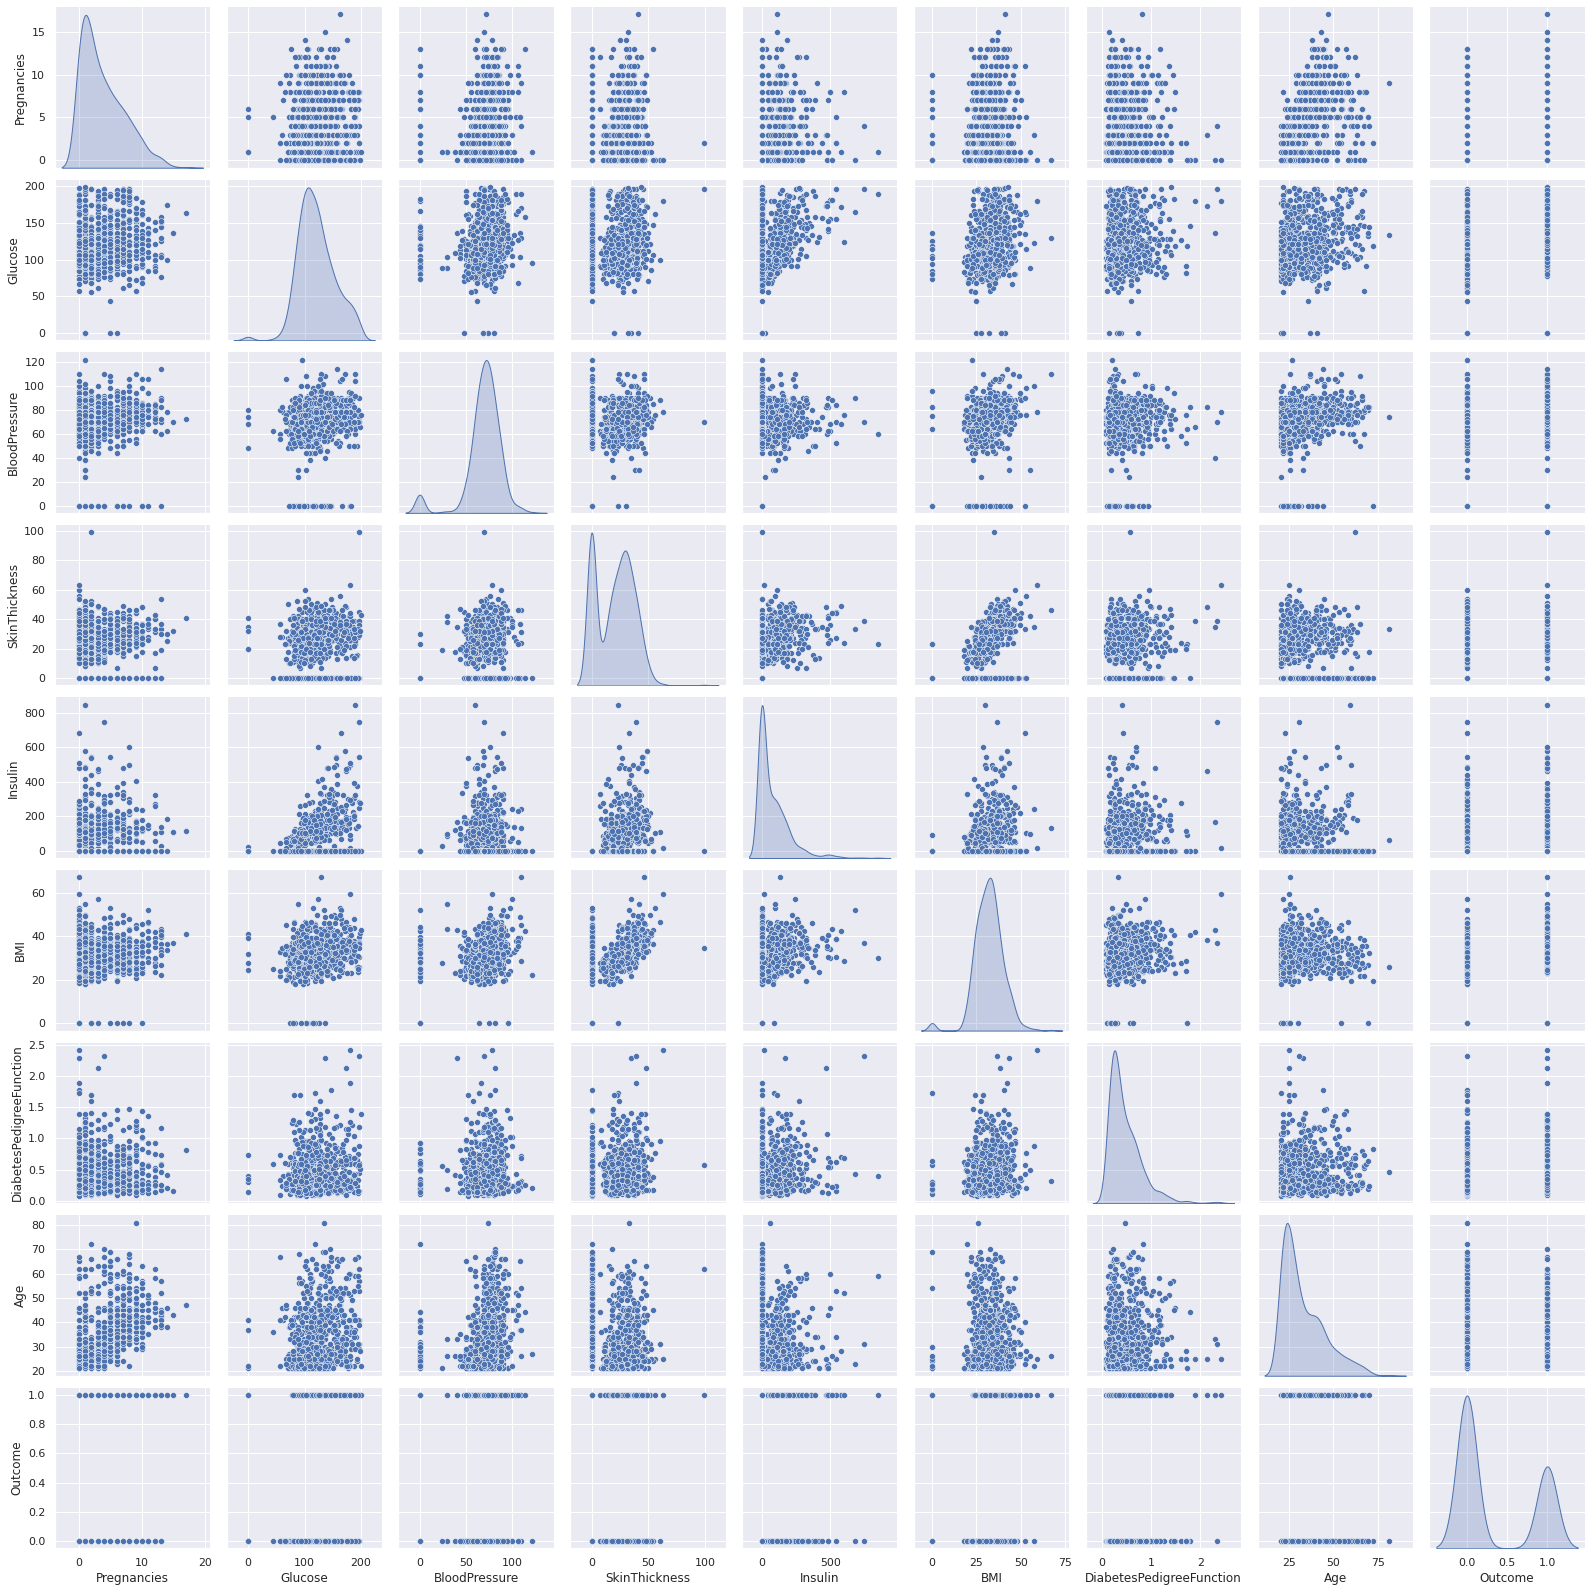

In [4]:
sns.pairplot(data=df, diag_kind = 'kde')

# Distribution of Outcomes

### We see that we have more negatives than positives

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


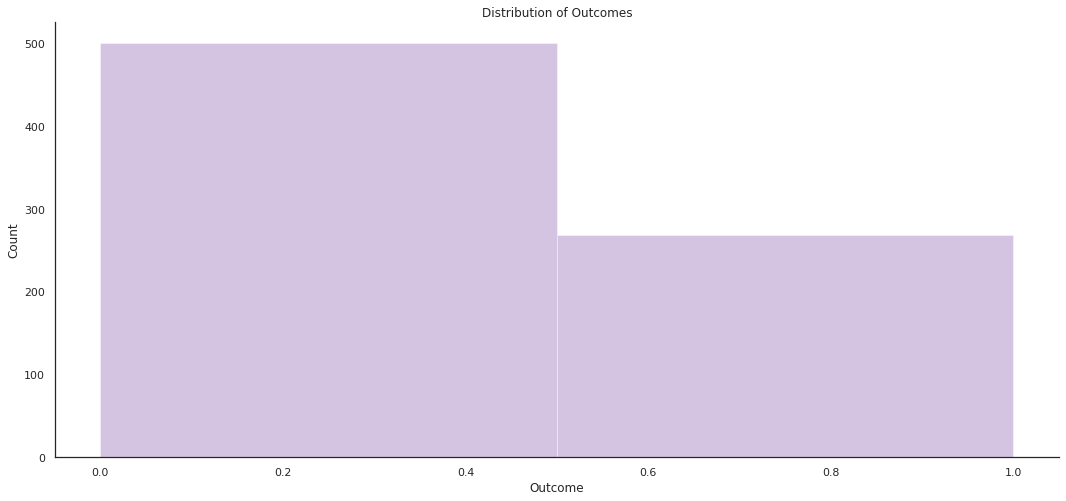

In [5]:
plt.figure(figsize = (18, 8))
sns.set(style="white", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(df['Outcome'], bins = 2, color = 'm', kde=False)
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
sns.despine()
plt.show()

# Distribution of Glucose by Outcome

### Looks like Glucose definitely has very different distributions conditioned on the outcome (diabetes). BMI also has noticably different distributions. 

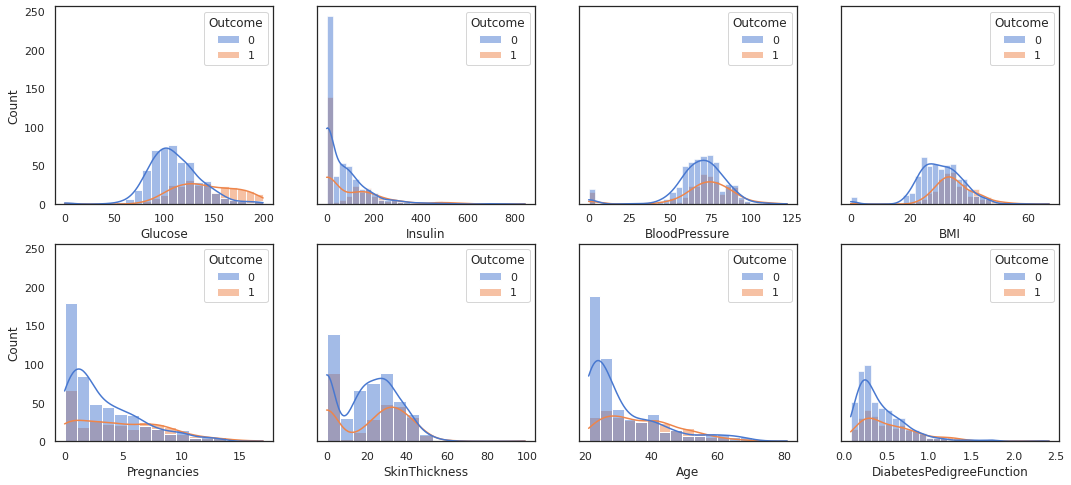

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8), sharey=True)
#Row 1
sns.histplot(df, ax=axes[0][0], x="Glucose", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[0][1],  x="Insulin", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[0][2],  x="BloodPressure", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[0][3],  x="BMI", hue="Outcome", kde=True)
#Row2
sns.histplot(df, ax=axes[1][0], x="Pregnancies", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[1][1],  x="SkinThickness", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[1][2],  x="Age", hue="Outcome", kde=True)
sns.histplot(df, ax=axes[1][3],  x="DiabetesPedigreeFunction", hue="Outcome", kde=True)

# Filter out Outliers

### There are some values that are zero which are suspicious so let's get rid of them in case they affect our model

In [7]:
print('Number of rows without filtering ',len(df))
new_df=df[df['Glucose']!=0]
print('After removing Glucose Outliers',len(new_df))

new_df=new_df[new_df['Insulin']!=0]
print('After removing Insulin Outliers',len(new_df))

new_df=new_df[new_df['BloodPressure']!=0]
print('After removing BloodPressure Outliers',len(new_df))

new_df=new_df[new_df['Glucose']!=0]
print('After removing Glucose Outliers',len(new_df))

new_df=new_df[new_df['Insulin']!=0]
print('After removing Insulin Outliers',len(new_df))

new_df=new_df[new_df['BMI']!=0]
print('After removing BMI Outliers',len(new_df))

new_df=new_df[new_df['SkinThickness']!=0]
print('After removing SkinThickness Outliers',len(new_df))

Number of rows without filtering  768
After removing Glucose Outliers 763
After removing Insulin Outliers 393
After removing BloodPressure Outliers 393
After removing Glucose Outliers 393
After removing Insulin Outliers 393
After removing BMI Outliers 392
After removing SkinThickness Outliers 392


In [8]:
X = new_df.drop(['Outcome'],axis=1)
y = new_df['Outcome']

# Running a Random Forest Classifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators = 300, max_depth=4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7538461538461538

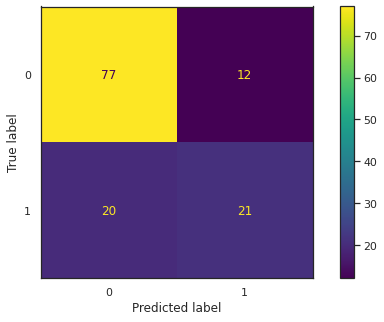

In [10]:
plot_confusion_matrix(clf, X_test, y_test)

# Interpreting the model with partial dependence plot

### First let's look at which features have high importance

In [11]:
for i,j in zip(X.columns,clf.feature_importances_):
    print(i,j)

Pregnancies 0.07880518320043185
Glucose 0.32672982405110756
BloodPressure 0.042761820109369214
SkinThickness 0.06467095987933112
Insulin 0.1751696912487009
BMI 0.09575147215108643
DiabetesPedigreeFunction 0.06358914355403267
Age 0.15252190580594027


## Now let's inspect the partial dependence plots for these features
### Each curve in a graph is a single datapoint that has had one of its feature values changed according to the X axis resulting in a partial dependence shown on the Y axis. The ticks on the X axis are deciles. 

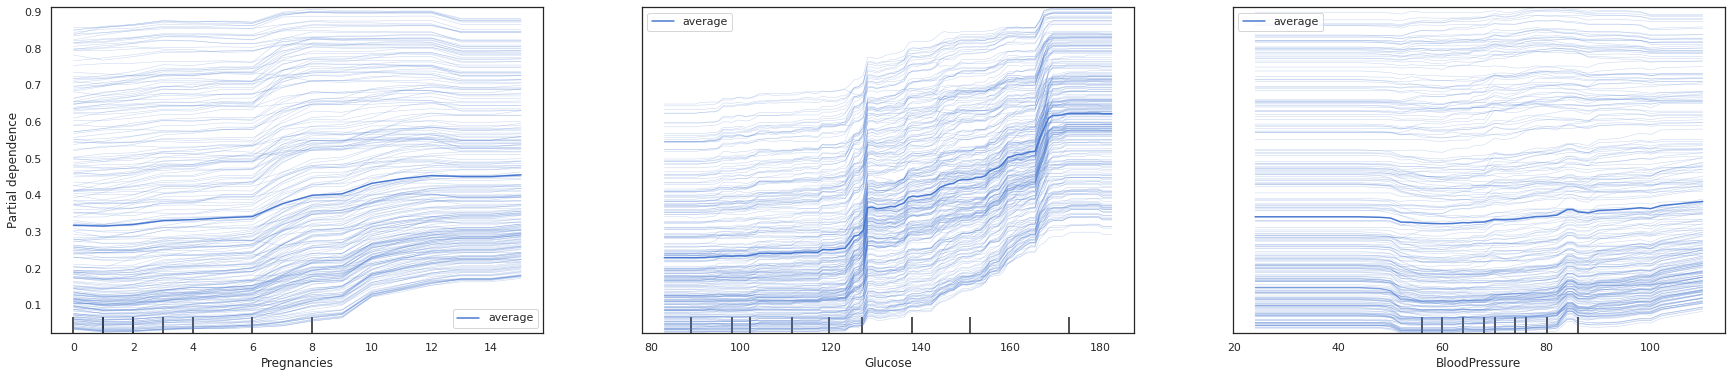

In [12]:
fig, ax = plt.subplots(figsize=(30, 6))
plot_partial_dependence(clf, X_train, [0,1,2], kind ='both', ax=ax)

*   ### For most data points, number of pregnancies don't matter a whole lot.

*   ### Glucose is a very important indicator.
*   ### High Blood Pressure is more important than low blood pressure. This is confirmed by other medical literature.

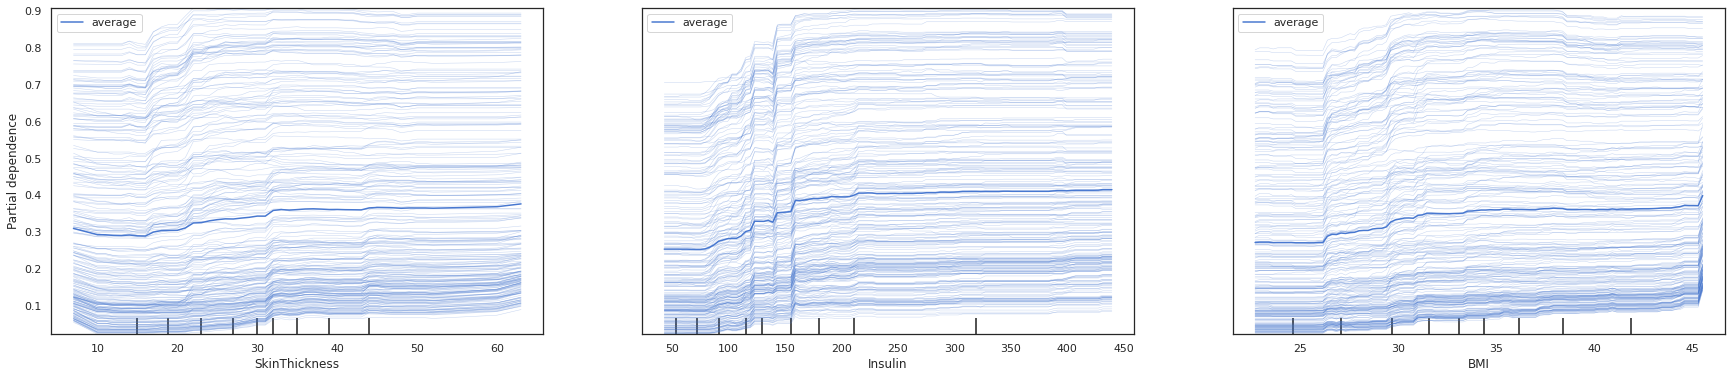

In [13]:
fig, ax = plt.subplots(figsize=(30, 6))
plot_partial_dependence(clf, X_train, [3,4,5], kind ='both', ax=ax)

### As expected, Insulin and BMI are very predictive of Diabetes

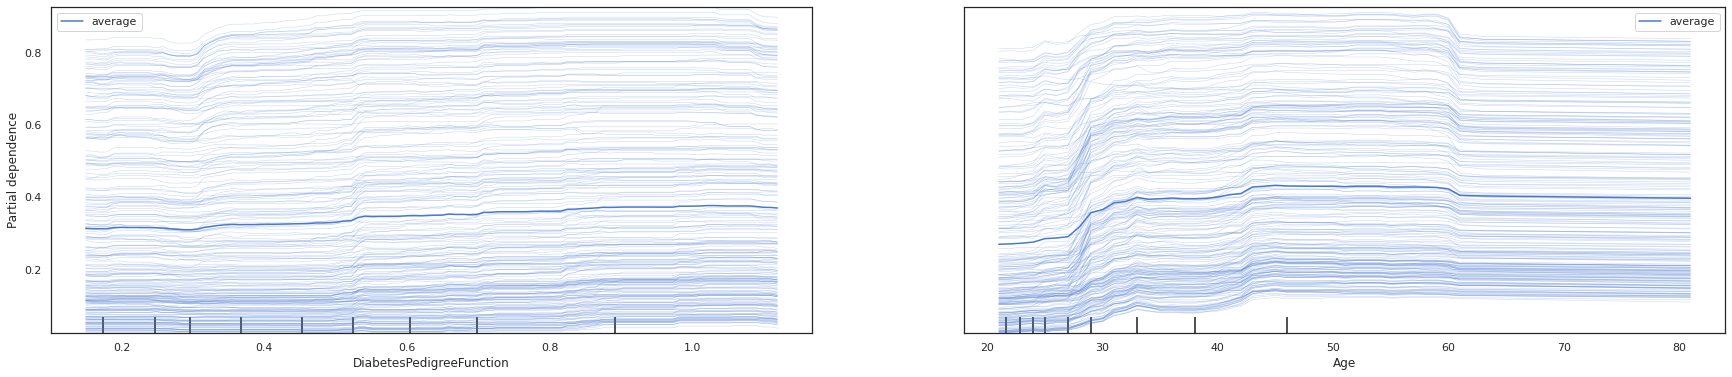

In [14]:
fig, ax = plt.subplots(figsize=(30, 6))
plot_partial_dependence(clf, X_train, [6,7], kind ='both', ax=ax)

### Age matters a lot but surpisingly the DiabetesPedigree Function does not

## Now let's look at a few joint partial dependence plots
### Lighter color means higher chance of classifying as being Diabetic

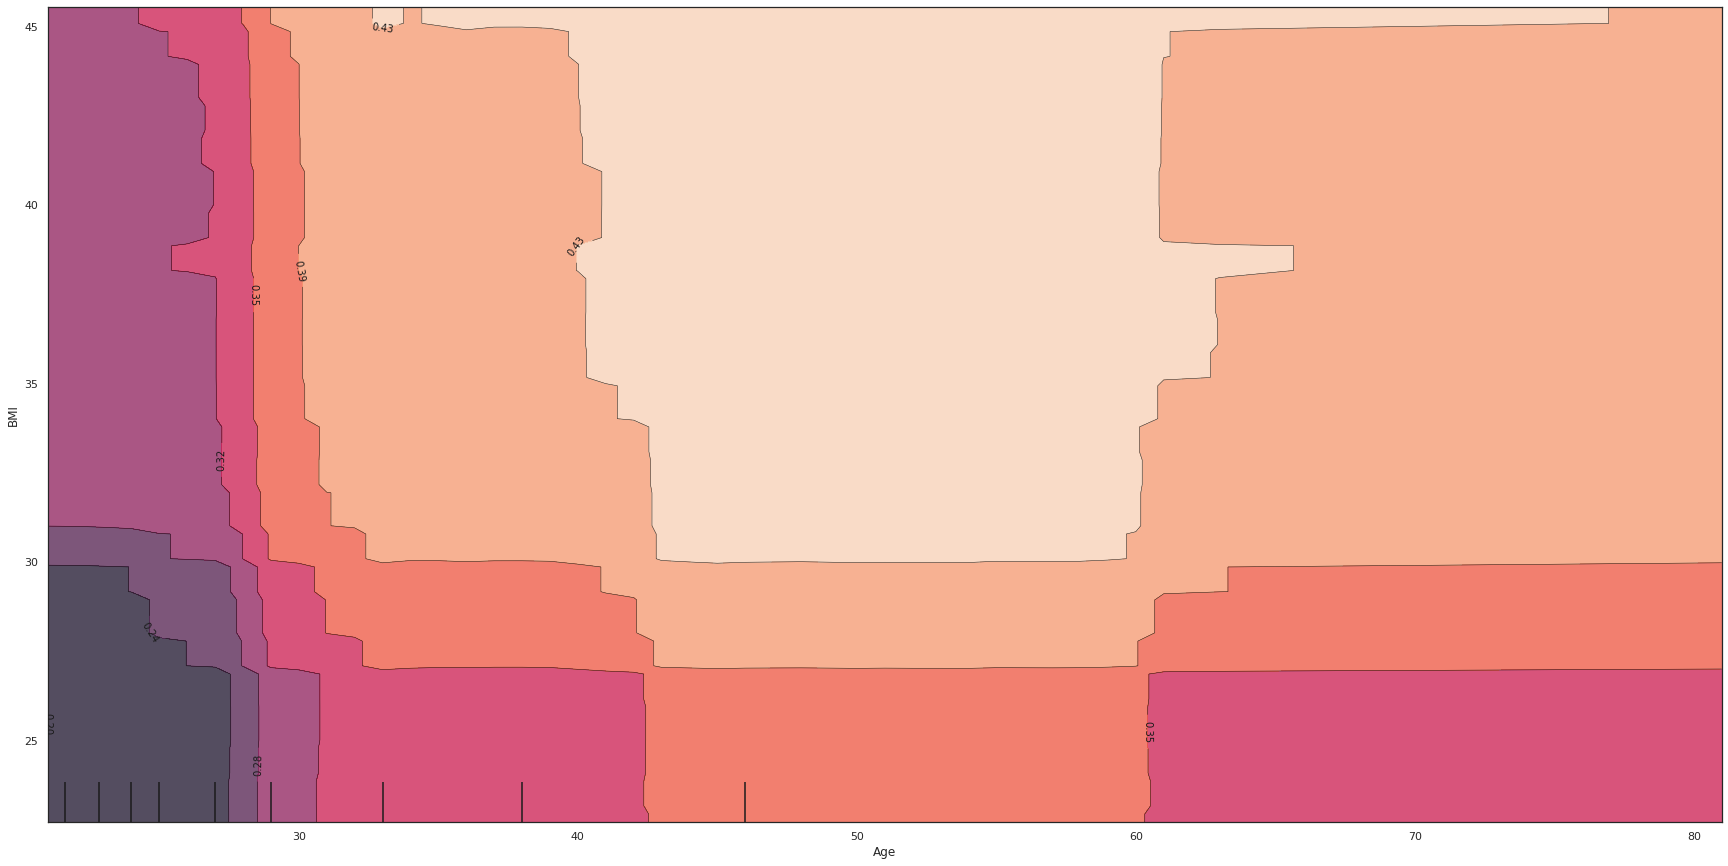

In [15]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_partial_dependence(clf, X_train, [(7,5)], kind ='average', ax=ax)

### In general increase in age increases risk but strangely enough beyond 60 years, the risk decreases. This is definitely something fishy so we would have to check again with our model and data. One possible reason is survivorship bias. 

### There is an inflection point for BMI at around 30-32. Any increase beyond that does not seem to have an impact.

### The strange shapes at Age 60-65 and BMI 35-40 might indicate overfitting 

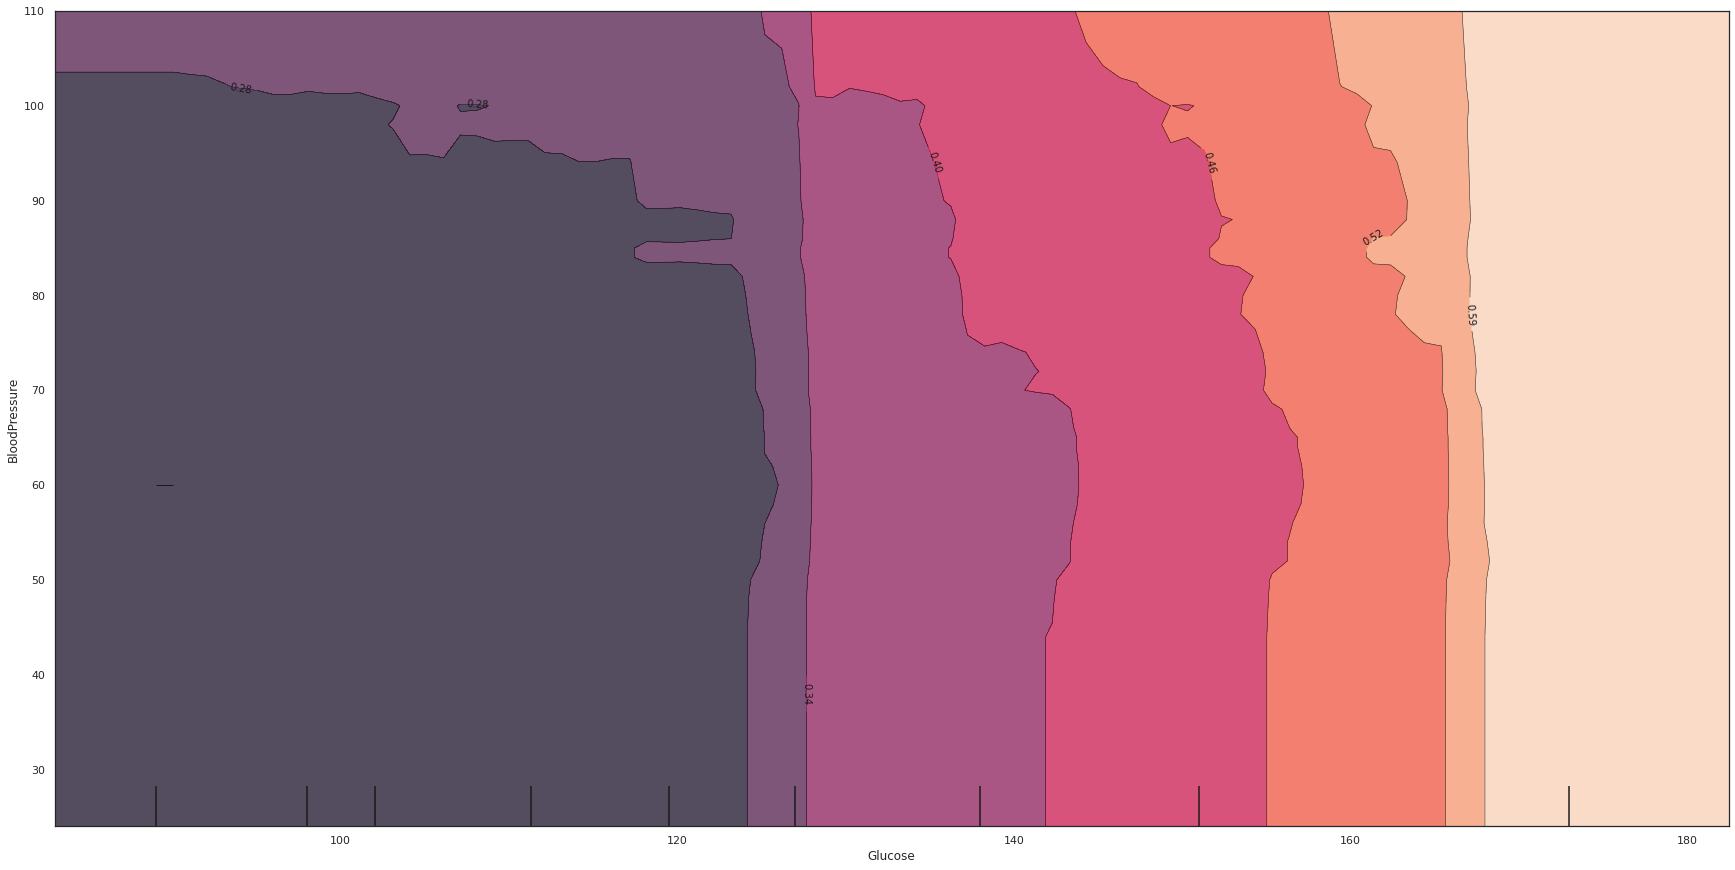

In [16]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_partial_dependence(clf, X_train, [(1,2)], kind ='average', ax=ax, n_jobs=10)

### Given a certain level of Glucose, Blood Pressure does not contribute to a significant change in classification unless it's above 100. For higher levels of Glucose (>155), Blood Pressure does not matter at all. Strange shapes can be observed at some boundaries indicating overfitting.

### The relationship of partial dependence with Glucose suggests that this could be a case of label leakage since it is almost tautologically related to Diabetes. 

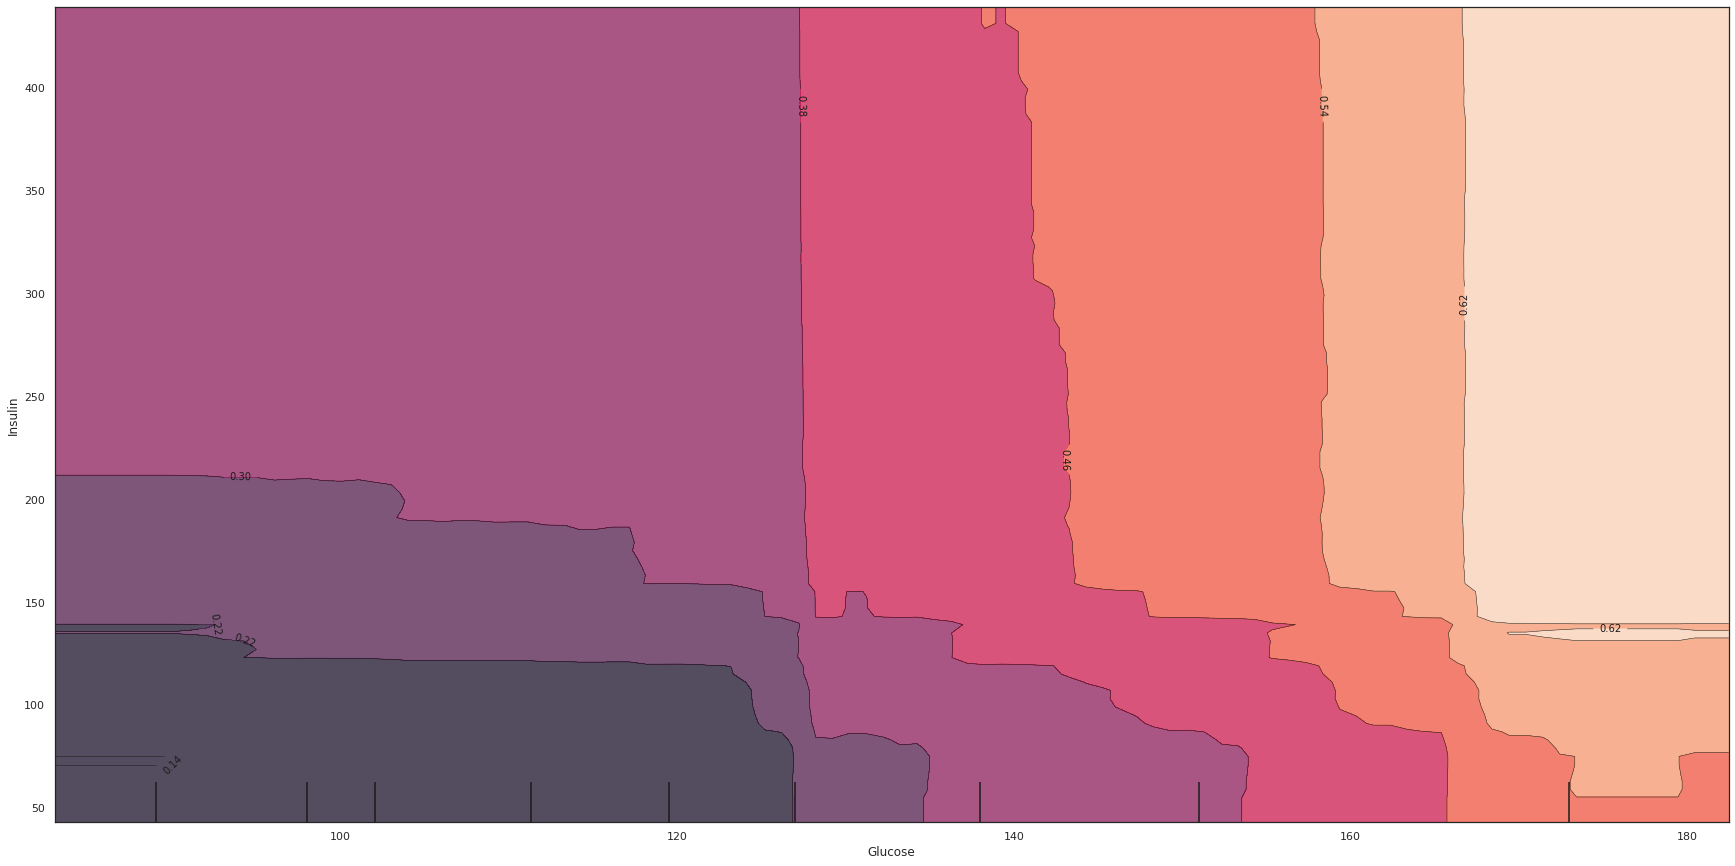

In [17]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_partial_dependence(clf, X_train, [(1,4)], kind ='average', ax=ax)

### Around Insulin = 150, we see some anamolies across different levels of Glucose. This needs further investigation. Perhaps 150 was used as a default value when measurements were not possible?

# Conclusion
### We have seen how we can glean insights from a trained model using partial dependence plots. We also saw how we can see deficiencies in our models like overfitting or biased training data just by reading these plots. 

### In our case we saw how Insulin, Glucose, Age and BMI impacted our model's predictions and thus understood how these factors contribute to Diabetes. We also understood that we can't be confident that our model has learnt the right relationship between Diabetes and Age for over 60 years. We might have to go back and do more data collection to fix that!